<span style="font-size: 4em; font-weight: bold; line-height: 1em;">Déterminer la probabilité que le revenu d'un individu est supérieur à 50K ou pas</span>

# CONTEXTE DU PROJET:

Il s’agit d’un problème de prédiction d’une variable cible catégorielle (income) à deux classes. Vous devez développer un modèle pour prédire si le revenu de l’individu est supérieur de 50k ou pas. Ici, on regroupe tous les types de réclamation en une seule classe. La variable cible est donc binaire.

Vous devez également discuter de l’importance relative des variables explicatives de votre modèle champion, et fournir une estimation de la performance attendue (erreur) de vos modèles. Vous avez donc les deux fichiers suivants :


+ 30636_E23_MainData.csv *(À diviser en trois: Train, Validation = ajustement du modèle et Test= comparer modèle arbre et regression logistique voir comment ça performe)*

+ 30636_E23_Score.csv *(Mandat final. À la fin quand on a choisit le meilleur modèle. on fait la même préparation que dans MainData. Quand on a le meilleur modèle choisi. On roule ce modèle sous score. Nous n'avons pas le Y. C'est normal. On prédit et Mina nous évaluera avec les valeurs Y qu'elle a.)*


Le premier est utilisé pour l’entrainement, et le deuxième est juste pour prédire la valeur de Y. Je vais par la suite utiliser le résultat de votre modèle pour comparer avec les vrais Ys.

**POINT BONUS:**

**Méthodologie :** description des manipulations aux données et méthodes d’analyses
utilisées; votre travail doit contenir **un modèle pour chaque méthode apprise dans ce
cours** et **une méthode non couverte** (parmis : **Gradint Boosting** [un des librairies
« lightgbm » ou « xgboost »], KNN, SVM). Mina recommande Gradint Boosting car très utilisé sur le marché.

***ce qui est important c'est que les méthodes d'ensembles ne sont pas en sur ou sous apprentissage, donc ajustement des hyperparamètres en faisant référence à la documentation sur Sklearn.***


## Description des variables

+ ID: identifiant de l’individu
+ age: une variable continue représentant l’âge de l’individu
+ workclass: une variable catégorielle représentant le type de travail de l’individu
+ fnlwgt: une variable continue
+ education: une variable catégorielle représentant le niveau d’éducation de l’individu
+ educational-num: une variable continue représentant le niveau d’éducation encodé
+ marital-status: une variable catégorielle représentant l’état civil de l’individu
+ occupation: une variable catégorielle représentant le métier de l’individu
+ relationship: une variable catégorielle représentant le lein de parenté de l’individu
+ race: une variable catégorielle représentant la race de l’individu
+ sex: une variable catégorielle représentant le genre de l’individu
+ capital-gain: une variable continue représentant le gain des activités d'investissement de l’individu
+ capital-loss: une variable continue représentant la perte des activités d'investissement de l’individu
+ hours-per-week: une variable continue représentant le nombre d’heures de travail par semaine de l’individu
+ native-country: une variable catégorielle représentant le pays d’origine de l’individu
+ income: une variable catégorielle représentant si l’individu a un revenu de plus de 50k par année ou pas (la variable cible)

# IMPORTER LES LIBRAIRIES

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from IPython.display import display, Markdown
from IPython.display import Image, display
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_hastie_10_2
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# pour la visualisation de roc
from sklearn.metrics import roc_curve

In [383]:
import imblearn
from imblearn.over_sampling import SMOTE

In [384]:
# Définir le nombre maximal de lignes et de colonnes à afficher
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# IMPORTER LES DONNÉES

In [385]:
data = pd.read_csv("30636_E23_MainData.csv", sep=",")

In [386]:
score = pd.read_csv("30636_E23_Score.csv", sep=",")

# CRÉER LES JEUX DE DONNÉES: *Train, Valid et Test*

Dans cette étape, on divise le jeu de données aux échantillons "entrainement", "validation" et "test"

In [387]:
X = data.drop(['income'],axis=1)
y = data['income']

In [388]:
# Séparation entre entraînement et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
    )

# Séparation supplémentaire de l'entraînenement en entraînement et validation 
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=21
    )

In [389]:
# Création des nouvelles variables pour l'arbre de décision
X_train_arbre = pd.DataFrame(X_train, columns=X.columns)
X_val_arbre = pd.DataFrame(X_val, columns=X.columns)
X_test_arbre = pd.DataFrame(X_test, columns=X.columns)

# Vérification des dimensions des nouvelles variables
#print("X_train_arbre: {0}".format(X_train_arbre.shape))
#print("X_val_arbre: {0}".format(X_val_arbre.shape))
#print("X_test_arbre: {0}".format(X_test_arbre.shape))

In [390]:
y_train_arbre = pd.DataFrame(y_train)
y_val_arbre = pd.DataFrame(y_val)
y_test_arbre = pd.DataFrame(y_test)

# Vérification des dimensions des nouvelles variables
#print("y_train_arbre: {0}".format(y_train_arbre.shape))
#print("y_val_arbre: {0}".format(y_val_arbre.shape))
#print("y_test_arbre: {0}".format(y_test_arbre.shape))

# L'ARBRE DE CLASSIFICATION

## Meilleures pratiques

**Commencer par couper les données et puis après nettoyage**

- Pas besoin pour l'arbre de classification vs. régression logistique:
- pas besoin de standadisation des variables continue, les mettre en échelle
- pas besoin de transformer les variables catégorielles
- pas besoin de multicolinérarité
- pas besoin de remplacer les données manquantes par medians sinon on biaise. L'arbre est capable de traiter les données manquantes comme classe, on remplace par un chiffre car sklearn nous oblige ex. âge manquant = -1

**On fait une étude plus détaillée sur chaque colonne. On vérifie s'il faut faire des transformations. Les transformations qu'on applique dans cette étape sont:**

- Créer les jeux de données Train Valid, Test
- Transformer en valeurs numériques les variables qui sont naturellement numériques, mais qui sont présentées dans d'autres formes ici
- Transformer les variables catégorielles au numérique
- Remplacer les données manquantes
- Créer de nouvelles variables



## Traitement automatique et rapide

Pour simplifier le traitement, on coupe nos jeu de données en 2 parties
- numérique
- objet

In [391]:
data.dtypes

ID                  int64
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

**On définit les listes de colonnes sans y => la valeur cible**

In [392]:
# On exclue la valeur 'ID' puisqu'elle n'a pas d'influence sur le modèle.
col_num = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']

col_objet = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'gender', 'native-country']

# Printing col_num
print("\033[1mColonnes numériques:\033[0m")
for col in col_num:
    print(col)

# Printing col_object
print("\n\033[1mColonnes d'objects:\033[0m")
for col in col_objet:
    print(col)

Colonnes numériques:
age
fnlwgt
educational-num
capital-gain
capital-loss
hours-per-week

Colonnes d'objects:
workclass
education
marital-status
occupation
relationship
race
gender
native-country


**On créé nos 2 groupes de jeux de données**

In [393]:
X_train_arbre_num = X_train_arbre[col_num]
X_val_arbre_num = X_val_arbre[col_num]
X_test_arbre_num = X_test_arbre[col_num]

# Vérification des dimensions des nouvelles variables num
#print("X_train_arbre_num: {0}".format(X_train_arbre_num.shape))
#print("X_val_arbre_num: {0}".format(X_val_arbre_num.shape))
#print("X_test_arbre_num: {0}".format(X_test_arbre_num.shape))

In [394]:
X_train_arbre_objet = X_train_arbre[col_objet]
X_val_arbre_objet = X_val_arbre[col_objet]
X_test_arbre_objet = X_test_arbre[col_objet]

# Vérification des dimensions des nouvelles variables objet
#print("X_train_arbre_objet: {0}".format(X_train_arbre_objet.shape))
#print("X_val_arbre_objet: {0}".format(X_val_arbre_objet.shape))
#print("X_test_arbre_objet: {0}".format(X_test_arbre_objet.shape))

## Traitement des variables numériques



### Il n'y a pas de données manquantes dans les variables numériques

In [395]:
# Vérification des données manquantes dans X_train_num
# Données manquantes dans X_train_num:")
# print(X_train_arbre_num.isna().sum())

# Vérification des données manquantes dans X_val_num
# print("\nDonnées manquantes dans X_val_num:")
# print(X_val_arbre_num.isna().sum())

# Vérification des données manquantes dans X_test_num
# print("\nDonnées manquantes dans X_test_num:")
# print(X_test_arbre_num.isna().sum())

### Traitement des valeurs "?"

In [396]:
# Vérifier s'il y a des valeurs "?" dans X_train_arbre_num
# print("\nDonnées ? dans X_train_arbre_num:")
# print((X_train_arbre_num == "?").sum().sum())

# Vérifier s'il y a des valeurs "?" dans X_val_arbre_num
# print("\nDonnées ? dans X_val_arbre_num:")
# print((X_val_arbre_num == "?").sum().sum())

# Vérifier s'il y a des valeurs "?" dans X_test_arbre_num
# print("\nDonnées ? dans X_test_arbre_num:")
# print((X_test_arbre_num == "?").sum().sum())

**A FAIRE CATEGORISER LA VARIABLE PAR SEMAINE **

## Traitement des variables catégorielles

### Il n'y a pas de données manquantes dans les variables d'object

In [397]:
"""
# Vérification des données manquantes dans X_train_objet
print("Données manquantes dans X_train_arbre_objet:")
print(X_train_arbre_objet.isna().sum())

# Vérification des données manquantes dans X_val_objet
print("\nDonnées manquantes dans X_val_arbre_objet:")
print(X_val_arbre_objet.isna().sum())

# Vérification des données manquantes dans X_test_objet
print("\nDonnées manquantes dans X_test_arbre_objet:")
print(X_test_arbre_objet.isna().sum())
"""

'\n# Vérification des données manquantes dans X_train_objet\nprint("Données manquantes dans X_train_arbre_objet:")\nprint(X_train_arbre_objet.isna().sum())\n\n# Vérification des données manquantes dans X_val_objet\nprint("\nDonnées manquantes dans X_val_arbre_objet:")\nprint(X_val_arbre_objet.isna().sum())\n\n# Vérification des données manquantes dans X_test_objet\nprint("\nDonnées manquantes dans X_test_arbre_objet:")\nprint(X_test_arbre_objet.isna().sum())\n'

### Traitement des valeurs "?"

In [398]:
"""
print("\nDonnées ? dans X_train_arbre_objet:")
# Vérifier s'il y a des valeurs "?" dans X_train_arbre_objet
print((X_train_arbre_objet == "?").sum())

print("\nDonnées ? dans X_val_arbre_objet:")
# Vérifier s'il y a des valeurs "?" dans X_val_arbre_objet
print((X_val_arbre_objet == "?").sum())

print("\nDonnées ? dans X_test_arbre_objet:")
# Vérifier s'il y a des valeurs "?" dans X_test_arbre_objet
print((X_test_arbre_objet == "?").sum())
"""

'\nprint("\nDonnées ? dans X_train_arbre_objet:")\n# Vérifier s\'il y a des valeurs "?" dans X_train_arbre_objet\nprint((X_train_arbre_objet == "?").sum())\n\nprint("\nDonnées ? dans X_val_arbre_objet:")\n# Vérifier s\'il y a des valeurs "?" dans X_val_arbre_objet\nprint((X_val_arbre_objet == "?").sum())\n\nprint("\nDonnées ? dans X_test_arbre_objet:")\n# Vérifier s\'il y a des valeurs "?" dans X_test_arbre_objet\nprint((X_test_arbre_objet == "?").sum())\n'

Nous avons pensé transformer les valeurs "?" en "nan" parce qu'en théorie, l'arbre peut traiter les valeurs manquantes sans avoir recours à l'imputation. En effet, la valeur "?" est une valeur string donc nous l'avons transformer pour que l'arbre puisse la reconnaitre au niveau computationel comme valeur manquante. Par contre, cette solution n'a pas fonctionné. Nous aurions pu décider de supprimer les lignes qui contiennent les points d'interrogation, mais nous aurions perdu une quantité d'information non négligable de valeurs sur les mêmes lignes.

**Nous avons donc décidé de tranformer les valeurs "?" en "PasDeRéponse" pour que l'arbre puisse continuer à traiter cette modalité comme une classe.**

In [399]:
# Remplacer les valeurs "?" par "pasDeReponse" dans X_train_arbre_objet
X_train_arbre_objet = X_train_arbre_objet.replace("?", "pasDeReponse")

# Remplacer les valeurs "?" par "pasDeReponse" dans X_val_arbre_objet
X_val_arbre_objet = X_val_arbre_objet.replace("?", "pasDeReponse")

# Remplacer les valeurs "?" par "pasDeReponse" dans X_test_arbre_objet
X_test_arbre_objet = X_test_arbre_objet.replace("?", "pasDeReponse")

"""
# Vérifier s'il y a des valeurs "?" dans X_train_arbre_objet
print("\nDonnées ? dans X_train_arbre_objet:")
print((X_train_arbre_objet == "?").sum())

# Vérifier s'il y a des valeurs "?" dans X_val_arbre_objet
print("\nDonnées ? dans X_val_arbre_objet:")
print((X_val_arbre_objet == "?").sum())

# Vérifier s'il y a des valeurs "?" dans X_test_arbre_objet
print("\nDonnées ? dans X_test_arbre_objet:")
print((X_test_arbre_objet == "?").sum())

# Imprimer les valeurs "pasDeReponse"
print("VALEURS PasDeRéponse")

# Vérifier s'il y a des valeurs NaN dans X_train_arbre_objet
print("\nDonnées PasDeRéponse dans X_train_arbre_objet :")
print(X_train_arbre_objet[X_train_arbre_objet == "pasDeReponse"].count())

# Vérifier s'il y a des valeurs NaN dans X_val_arbre_objet
print("\nDonnées PasDeRéponse dans X_val_arbre_objet :")
print(X_val_arbre_objet[X_val_arbre_objet == "pasDeReponse"].count())

# Vérifier s'il y a des valeurs NaN dans X_test_arbre_objet
print("\nDonnées PasDeRéponse dans X_test_arbre_objet :")
print(X_test_arbre_objet[X_test_arbre_objet == "pasDeReponse"].count())
"""

'\n# Vérifier s\'il y a des valeurs "?" dans X_train_arbre_objet\nprint("\nDonnées ? dans X_train_arbre_objet:")\nprint((X_train_arbre_objet == "?").sum())\n\n# Vérifier s\'il y a des valeurs "?" dans X_val_arbre_objet\nprint("\nDonnées ? dans X_val_arbre_objet:")\nprint((X_val_arbre_objet == "?").sum())\n\n# Vérifier s\'il y a des valeurs "?" dans X_test_arbre_objet\nprint("\nDonnées ? dans X_test_arbre_objet:")\nprint((X_test_arbre_objet == "?").sum())\n\n# Imprimer les valeurs "pasDeReponse"\nprint("VALEURS PasDeRéponse")\n\n# Vérifier s\'il y a des valeurs NaN dans X_train_arbre_objet\nprint("\nDonnées PasDeRéponse dans X_train_arbre_objet :")\nprint(X_train_arbre_objet[X_train_arbre_objet == "pasDeReponse"].count())\n\n# Vérifier s\'il y a des valeurs NaN dans X_val_arbre_objet\nprint("\nDonnées PasDeRéponse dans X_val_arbre_objet :")\nprint(X_val_arbre_objet[X_val_arbre_objet == "pasDeReponse"].count())\n\n# Vérifier s\'il y a des valeurs NaN dans X_test_arbre_objet\nprint("\nDon

## Traitement des variables y => variable cible

In [400]:
col_y = ['income']
y_train_arbre

,income
46331,<=50K
18143,>50K
12070,<=50K
15072,<=50K
30962,>50K
...,...
8159,<=50K
30123,<=50K
9328,<=50K
1953,<=50K


In [401]:
"""
# Vérification des données manquantes dans y_train_arbre
print("Données manquantes dans X_train_objet:")
print(y_train_arbre.isna().sum())

# Vérification des données manquantes dans y_train_arbre
print("\nDonnées manquantes dans X_val_objet:")
print(y_val_arbre.isna().sum())

# Vérification des données manquantes dans y_test_arbre
print("\nDonnées manquantes dans y_test_arbre:")
print(y_test_arbre.isna().sum())
"""

'\n# Vérification des données manquantes dans y_train_arbre\nprint("Données manquantes dans X_train_objet:")\nprint(y_train_arbre.isna().sum())\n\n# Vérification des données manquantes dans y_train_arbre\nprint("\nDonnées manquantes dans X_val_objet:")\nprint(y_val_arbre.isna().sum())\n\n# Vérification des données manquantes dans y_test_arbre\nprint("\nDonnées manquantes dans y_test_arbre:")\nprint(y_test_arbre.isna().sum())\n'

### Supprimer les 3 valeurs *y* manquantes et les lignes associées

In [402]:
# Supprimer les lignes contenant des valeurs manquantes dans la colonne "income" de y_train
y_train_arbre.dropna(subset=['income'], inplace=True)
X_train_arbre_num = X_train_arbre_num.loc[y_train_arbre.index]
X_train_arbre_objet = X_train_arbre_objet.loc[y_train_arbre.index]

# Supprimer les lignes contenant des valeurs manquantes dans la colonne "income" de y_val
y_val_arbre.dropna(subset=['income'], inplace=True)
X_val_arbre_num = X_val_arbre_num.loc[y_val_arbre.index]
X_val_arbre_objet = X_val_arbre_objet.loc[y_val_arbre.index]

# Supprimer les lignes contenant des valeurs manquantes dans la colonne "income" de y_test
y_test_arbre.dropna(subset=['income'], inplace=True)
X_test_arbre_num = X_test_arbre_num.loc[y_test_arbre.index]
X_test_arbre_objet = X_test_arbre_objet.loc[y_test_arbre.index]

"""
# Vérifier que les données manquantes ont disparu pour chaque groupe de données y
print(y_train_arbre.isna().sum())
print(y_val_arbre.isna().sum())
print(y_test_arbre.isna().sum())
"""

'\n# Vérifier que les données manquantes ont disparu pour chaque groupe de données y\nprint(y_train_arbre.isna().sum())\nprint(y_val_arbre.isna().sum())\nprint(y_test_arbre.isna().sum())\n'

In [403]:
"""
# Vérification des dimensions des nouvelles variables num
print("X_train_arbre_num: {0}".format(X_train_arbre_num.shape))
print("X_val_arbre_num: {0}".format(X_val_arbre_num.shape))
print("X_test_arbre_num: {0}".format(X_test_arbre_num.shape))
"""

'\n# Vérification des dimensions des nouvelles variables num\nprint("X_train_arbre_num: {0}".format(X_train_arbre_num.shape))\nprint("X_val_arbre_num: {0}".format(X_val_arbre_num.shape))\nprint("X_test_arbre_num: {0}".format(X_test_arbre_num.shape))\n'

In [404]:
"""
# Vérification des dimensions des nouvelles variables objet
print("X_train_arbre_objet: {0}".format(X_train_arbre_objet.shape))
print("X_val_arbre_objet: {0}".format(X_val_arbre_objet.shape))
print("X_test_arbre_objet: {0}".format(X_test_arbre_objet.shape))
"""

'\n# Vérification des dimensions des nouvelles variables objet\nprint("X_train_arbre_objet: {0}".format(X_train_arbre_objet.shape))\nprint("X_val_arbre_objet: {0}".format(X_val_arbre_objet.shape))\nprint("X_test_arbre_objet: {0}".format(X_test_arbre_objet.shape))\n'

In [405]:
"""
# Vérification des dimensions des nouvelles variables
print("y_train_arbre: {0}".format(y_train_arbre.shape))
print("y_val_arbre: {0}".format(y_val_arbre.shape))
print("y_test_arbre: {0}".format(y_test_arbre.shape))
"""

'\n# Vérification des dimensions des nouvelles variables\nprint("y_train_arbre: {0}".format(y_train_arbre.shape))\nprint("y_val_arbre: {0}".format(y_val_arbre.shape))\nprint("y_test_arbre: {0}".format(y_test_arbre.shape))\n'

## Regrouper les modalités moins fréquentes

Ce code calcule d'abord les modalités les moins fréquentes pour chaque colonne de l'ensemble d'apprentissage et les entreprosent dans un dictionnaire. Ensuite, pour chaque colonne de df_cat, il vérifie si la colonne se trouve dans le dictionnaire least_freq_modalities et remplace l'une des modalités les moins fréquentes de la colonne par la chaîne "other".

Notez que ce code suppose que les trois ensembles ont le même ensemble de colonnes et que les colonnes sont dans le même ordre. Si ce n'est pas le cas, vous devrez peut-être effectuer des vérifications et des modifications supplémentaires pour vous assurer que le code fonctionne correctement.

In [406]:
# Je réitère sur les colonnes catégorielles spécifiées dans col_object déclaré plus haut dans le code
# col_objet = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'gender', 'native-country']
least_freq_modalities = {}
for col in col_objet:
    modalities = X_train_arbre_objet[col].value_counts(normalize=True)

    #Ces modalités sont stockées dans la liste least_freq_modalities.    
    ## Cette expression renvoie un ensemble des modalités dont la fréquence est inférieure à 0,05.
    least_freq_modalities = set(modalities.loc[modalities < 0.05].index)
    
    print(least_freq_modalities)

{'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked', 'Federal-gov'}
{'Preschool', '1st-4th', '7th-8th', 'Assoc-acdm', 'Doctorate', '5th-6th', 'Assoc-voc', '11th', '12th', '10th', '9th', 'Prof-school'}
{'Widowed', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse'}
{'Priv-house-serv', 'Handlers-cleaners', 'Armed-Forces', 'Transport-moving', 'Protective-serv', 'Tech-support', 'Farming-fishing'}
{'Wife', 'Other-relative'}
{'Amer-Indian-Eskimo', 'Other', 'Asian-Pac-Islander'}
set()
{'Japan', 'Scotland', 'pasDeReponse', 'Yugoslavia', 'Greece', 'Trinadad&Tobago', 'Dominican-Republic', 'Nicaragua', 'Ecuador', 'Thailand', 'Columbia', 'Honduras', 'Hong', 'Holand-Netherlands', 'Peru', 'Italy', 'El-Salvador', 'Haiti', 'Cuba', 'Jamaica', 'Iran', 'Puerto-Rico', 'Cambodia', 'Hungary', 'Poland', 'Vietnam', 'Portugal', 'France', 'Ireland', 'Canada', 'Philippines', 'Taiwan', 'India', 'Outlying-US(Guam-USVI-etc)', 'Guatemala', 'England', 'China', 'Mexico', 'South', 'Laos', 'Germany'}


### Workclass

Nous souhaitons regrouper les modalités suivantes: 
- "Gov" : Local-gov, State-gov, Federal-gov
- "Self-emp": Self-emp-not-inc, Self-emp-inc
- "Not-working": Without-pay, Never-worked

In [407]:
"""
print("Descriptive Statistics for 'workclass' in X_train:")
print(X_train_arbre_objet['workclass'].value_counts())

# Subtitle for X_val['workclass'] descriptive statistics
print("Descriptive Statistics for 'workclass' in X_val:")
print(X_val_arbre_objet['workclass'].value_counts())

# Subtitle for X_test['workclass'] descriptive statistics
print("Descriptive Statistics for 'workclass' in X_test:")
print(X_test_arbre_objet['workclass'].value_counts())
"""

'\nprint("Descriptive Statistics for \'workclass\' in X_train:")\nprint(X_train_arbre_objet[\'workclass\'].value_counts())\n\n# Subtitle for X_val[\'workclass\'] descriptive statistics\nprint("Descriptive Statistics for \'workclass\' in X_val:")\nprint(X_val_arbre_objet[\'workclass\'].value_counts())\n\n# Subtitle for X_test[\'workclass\'] descriptive statistics\nprint("Descriptive Statistics for \'workclass\' in X_test:")\nprint(X_test_arbre_objet[\'workclass\'].value_counts())\n'

**Grâce au code ci-dessous, nous avons décidé de nommer une nouvelle catégorie "Not-working" regroupant "Never-Worked" et "Without-Pay". Nous n'avons pas voulu nommé cette nouvelle catégorie "No income" car deux "Without-pay" ont >50K.**

In [408]:
# Filter the DataFrame based on the specified conditions
filtered_data = data[data['workclass'].isin(['Without-pay', 'Never-worked'])]

# Select the 'workclass' and 'income' columns from the filtered data
income_values = filtered_data[['workclass', 'income']]

# Display the workclass and income values
# print(income_values)

In [409]:
# Regrouper les valeurs spécifiées de la classe de travail (workclass)
mapping_workclass = {
    'Private': 'Private',  # Garder 'Private' tel quel
    '?': '?',  # Garder '?' tel quel
    'Local-gov': 'Gov',  # Regrouper 'Local-gov' avec 'Gov'
    'State-gov': 'Gov',  # Regrouper 'State-gov' avec 'Gov'
    'Federal-gov': 'Gov',  # Regrouper 'Federal-gov' avec 'Gov'
    'Self-emp-not-inc': 'Self-emp',  # Regrouper 'Self-emp-not-inc' avec 'Self-emp'
    'Self-emp-inc': 'Self-emp',  # Regrouper 'Self-emp-inc' avec 'Self-emp'
    'Without-pay': 'Not-working',  # Regrouper 'Without-pay' avec 'Not-working'
    'Never-worked': 'Not-working'  # Regrouper 'Never-worked' avec 'Not-working'
}

# Appliquer le regroupement à la colonne 'workclass' dans chaque DataFrame
X_train_arbre_objet['workclass'] = X_train_arbre_objet['workclass'].replace(mapping_workclass)
X_val_arbre_objet['workclass'] = X_val_arbre_objet['workclass'].replace(mapping_workclass)
X_test_arbre_objet['workclass'] = X_test_arbre_objet['workclass'].replace(mapping_workclass)

"""
# Sous-titre pour les statistiques descriptives de 'workclass' dans X_train_arbre
print("Statistiques descriptives pour 'workclass' dans X_train_arbre_objet:")
print(X_train_arbre_objet['workclass'].value_counts())

# Sous-titre pour les statistiques descriptives de 'workclass' dans X_val_arbre
print("Statistiques descriptives pour 'workclass' dans X_val_arbre_objet:")
print(X_val_arbre_objet['workclass'].value_counts())

# Sous-titre pour les statistiques descriptives de 'workclass' dans X_test_arbre
print("Statistiques descriptives pour 'workclass' dans X_test_arbre_objet:")
print(X_test_arbre_objet['workclass'].value_counts())
"""

'\n# Sous-titre pour les statistiques descriptives de \'workclass\' dans X_train_arbre\nprint("Statistiques descriptives pour \'workclass\' dans X_train_arbre_objet:")\nprint(X_train_arbre_objet[\'workclass\'].value_counts())\n\n# Sous-titre pour les statistiques descriptives de \'workclass\' dans X_val_arbre\nprint("Statistiques descriptives pour \'workclass\' dans X_val_arbre_objet:")\nprint(X_val_arbre_objet[\'workclass\'].value_counts())\n\n# Sous-titre pour les statistiques descriptives de \'workclass\' dans X_test_arbre\nprint("Statistiques descriptives pour \'workclass\' dans X_test_arbre_objet:")\nprint(X_test_arbre_objet[\'workclass\'].value_counts())\n'

### Education

Nous souhaitons regrouper
"before-HS-grad": Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th
"Assoc": Assoc-voc, Assoc-acdm, Pro-school

In [410]:
"""
print("Descriptive Statistics for 'education' in X_train_arbre_objet:")
print(X_train_arbre_objet['education'].value_counts())

print("Descriptive Statistics for 'education' in X_val_arbre_objet:")
print(X_val_arbre_objet['education'].value_counts())

print("Descriptive Statistics for 'education' in X_test_arbre_objet:")
print(X_test_arbre_objet['education'].value_counts())
"""

'\nprint("Descriptive Statistics for \'education\' in X_train_arbre_objet:")\nprint(X_train_arbre_objet[\'education\'].value_counts())\n\nprint("Descriptive Statistics for \'education\' in X_val_arbre_objet:")\nprint(X_val_arbre_objet[\'education\'].value_counts())\n\nprint("Descriptive Statistics for \'education\' in X_test_arbre_objet:")\nprint(X_test_arbre_objet[\'education\'].value_counts())\n'

**On regroupe les modalités pour "before-HS-grad":**

In [411]:
# Définir les modalités ayant besoin d'être regroupées 
modalities_to_regroup = ['Preschool', '1st-4th','5th-6th','7th-8th','9th','10th','11th','12th']

# Définir notre nouvelle modalité 
new_modality = 'before-HS-grad'

# Remplacer les modalités  
X_train_arbre_objet['education'] = X_train_arbre_objet['education'].replace(modalities_to_regroup, new_modality)
X_val_arbre_objet['education'] = X_val_arbre_objet['education'].replace(modalities_to_regroup, new_modality)
X_test_arbre_objet['education'] = X_test_arbre_objet['education'].replace(modalities_to_regroup, new_modality)

"""
# Print le résultat pour être sûr d'avoir bien transformé nos modalités 
print(X_train_arbre_objet['education'].value_counts())
print(X_val_arbre_objet['education'].value_counts())
print(X_test_arbre_objet['education'].value_counts())
"""

"\n# Print le résultat pour être sûr d'avoir bien transformé nos modalités \nprint(X_train_arbre_objet['education'].value_counts())\nprint(X_val_arbre_objet['education'].value_counts())\nprint(X_test_arbre_objet['education'].value_counts())\n"

**On regroupe les modalités pour "Assoc":**

In [412]:
# Définir les modalités ayant besoin d'être regroupées 
modalities_to_regroup = ['Assoc-voc', 'Assoc-acdm','Prof-school']

# Définir notre nouvelle modalité 
new_modality = 'Assoc'

# Remplacer les modalités  
X_train_arbre_objet['education'] = X_train_arbre_objet['education'].replace(modalities_to_regroup, new_modality)
X_val_arbre_objet['education'] = X_val_arbre_objet['education'].replace(modalities_to_regroup, new_modality)
X_test_arbre_objet['education'] = X_test_arbre_objet['education'].replace(modalities_to_regroup, new_modality)

"""
# Print le résultat pour être sûr d'avoir bien transformé nos modalités 
print(X_train_arbre_objet['education'].value_counts())
print(X_val_arbre_objet['education'].value_counts())
print(X_test_arbre_objet['education'].value_counts())
"""

"\n# Print le résultat pour être sûr d'avoir bien transformé nos modalités \nprint(X_train_arbre_objet['education'].value_counts())\nprint(X_val_arbre_objet['education'].value_counts())\nprint(X_test_arbre_objet['education'].value_counts())\n"

### Marital-status

On souhaite garder:
- Married-civ-spouse: "Married-civ-spouse"
- Never-married: "Never-married"

On souhaite regrouper les modalités moins fréquentes: 
- "Separated": Separated, Divorced
- "Others": Married-spouse-absent, Widowed, Married-AF-spouse

In [413]:
"""
print("Descriptive Statistics for 'marital-status' in X_train_arbre_objet:")
print(X_train_arbre_objet['marital-status'].value_counts())

# Subtitle for X_val['marital-status'] descriptive statistics
print("Descriptive Statistics for 'marital-status' in X_val_arbre_objet:")
print(X_val_arbre_objet['marital-status'].value_counts())

# Subtitle for X_test['marital-status'] descriptive statistics
print("Descriptive Statistics for 'marital-status' in X_test_arbre_objet:")
print(X_test_arbre_objet['marital-status'].value_counts())
"""

'\nprint("Descriptive Statistics for \'marital-status\' in X_train_arbre_objet:")\nprint(X_train_arbre_objet[\'marital-status\'].value_counts())\n\n# Subtitle for X_val[\'marital-status\'] descriptive statistics\nprint("Descriptive Statistics for \'marital-status\' in X_val_arbre_objet:")\nprint(X_val_arbre_objet[\'marital-status\'].value_counts())\n\n# Subtitle for X_test[\'marital-status\'] descriptive statistics\nprint("Descriptive Statistics for \'marital-status\' in X_test_arbre_objet:")\nprint(X_test_arbre_objet[\'marital-status\'].value_counts())\n'

In [414]:
# Garder les modalités spécifiques dans la colonne 'marital-status'
mapping_marital_status = {
    'Married-civ-spouse': 'Married-civ-spouse',  # Garder 'Married-civ-spouse' tel quel
    'Never-married': 'Never-married'  # Garder 'Never-married' tel quel
}

# Regrouper les modalités moins fréquentes dans la colonne 'marital-status'
mapping_marital_status_grouping = {
    'Separated': 'Separated',  # Regrouper 'Separated' tel quel
    'Divorced': 'Separated',  # Regrouper 'Divorced' avec 'Separated'
    'Married-spouse-absent': 'Others',  # Regrouper 'Married-spouse-absent' avec 'Others'
    'Widowed': 'Others',  # Regrouper 'Widowed' avec 'Others'
    'Married-AF-spouse': 'Others'  # Regrouper 'Married-AF-spouse' avec 'Others'
}

# Appliquer les regroupements à la colonne 'marital-status' dans chaque DataFrame
X_train_arbre_objet['marital-status'] = X_train_arbre_objet['marital-status'].replace(mapping_marital_status)
X_val_arbre_objet['marital-status'] = X_val_arbre_objet['marital-status'].replace(mapping_marital_status)
X_test_arbre_objet['marital-status'] = X_test_arbre_objet['marital-status'].replace(mapping_marital_status)

X_train_arbre_objet['marital-status'] = X_train_arbre_objet['marital-status'].replace(mapping_marital_status_grouping)
X_val_arbre_objet['marital-status'] = X_val_arbre_objet['marital-status'].replace(mapping_marital_status_grouping)
X_test_arbre_objet['marital-status'] = X_test_arbre_objet['marital-status'].replace(mapping_marital_status_grouping)

"""
# Sous-titre pour les statistiques descriptives de 'marital-status' dans X_train_arbre_objet
print("Statistiques descriptives pour 'marital-status' dans X_train_arbre:")
print(X_train_arbre_objet['marital-status'].value_counts())

# Sous-titre pour les statistiques descriptives de 'marital-status' dans X_val_arbre_objet
print("Statistiques descriptives pour 'marital-status' dans X_val_arbre:")
print(X_val_arbre_objet['marital-status'].value_counts())

# Sous-titre pour les statistiques descriptives de 'marital-status' dans X_test_arbre_objet
print("Statistiques descriptives pour 'marital-status' dans X_test_arbre:")
print(X_test_arbre_objet['marital-status'].value_counts())
"""

'\n# Sous-titre pour les statistiques descriptives de \'marital-status\' dans X_train_arbre_objet\nprint("Statistiques descriptives pour \'marital-status\' dans X_train_arbre:")\nprint(X_train_arbre_objet[\'marital-status\'].value_counts())\n\n# Sous-titre pour les statistiques descriptives de \'marital-status\' dans X_val_arbre_objet\nprint("Statistiques descriptives pour \'marital-status\' dans X_val_arbre:")\nprint(X_val_arbre_objet[\'marital-status\'].value_counts())\n\n# Sous-titre pour les statistiques descriptives de \'marital-status\' dans X_test_arbre_objet\nprint("Statistiques descriptives pour \'marital-status\' dans X_test_arbre:")\nprint(X_test_arbre_objet[\'marital-status\'].value_counts())\n'

### Occupation

Nous allons regrouper les modalités moins fréquentes:

"Others": {'Armed-Forces', 'Farming-fishing', 'Transport-moving', 'Protective-serv', 'Handlers-cleaners', 'Tech-support', 'Priv-house-serv'}

In [415]:
"""
print("Descriptive Statistics for 'occupation' in X_train_arbre_objet:")
print(X_train_arbre_objet['occupation'].value_counts())

# Subtitle for X_val['occupation'] descriptive statistics
print("Descriptive Statistics for 'occupation' in X_val_arbre_objet:")
print(X_val_arbre_objet['occupation'].value_counts())

# Subtitle for X_test['occupation'] descriptive statistics
print("Descriptive Statistics for 'occupation' in X_test_arbre_objet:")
print(X_test_arbre_objet['occupation'].value_counts())
"""

'\nprint("Descriptive Statistics for \'occupation\' in X_train_arbre_objet:")\nprint(X_train_arbre_objet[\'occupation\'].value_counts())\n\n# Subtitle for X_val[\'occupation\'] descriptive statistics\nprint("Descriptive Statistics for \'occupation\' in X_val_arbre_objet:")\nprint(X_val_arbre_objet[\'occupation\'].value_counts())\n\n# Subtitle for X_test[\'occupation\'] descriptive statistics\nprint("Descriptive Statistics for \'occupation\' in X_test_arbre_objet:")\nprint(X_test_arbre_objet[\'occupation\'].value_counts())\n'

**On crée la modalité "Others"**

In [416]:
# Définir les modalités ayant besoin d'être regroupées 
modalities_to_regroup = ['Protective-serv', 'Priv-house-serv', 'Other-service ']

# Définir notre nouvelle modalité 
new_modality = 'Others'

# Remplacer les modalités  
X_test_arbre_objet['occupation'] = X_test_arbre_objet['occupation'].replace(modalities_to_regroup, new_modality)
X_val_arbre_objet['occupation'] = X_val_arbre_objet['occupation'].replace(modalities_to_regroup, new_modality)
X_test_arbre_objet['occupation'] = X_test_arbre_objet['occupation'].replace(modalities_to_regroup, new_modality)

"""
# Print le résultat pour être sûr d'avoir bien transformé nos modalités
print("Descriptive Statistics for 'occupation' in X_train_arbre_objet:")
print(X_train_arbre_objet['occupation'].value_counts())
print("Descriptive Statistics for 'occupation' in X_val_arbre_objet:")
print(X_val_arbre_objet['occupation'].value_counts())
print("Descriptive Statistics for 'occupation' in X_test_arbre_objet:")
print(X_test_arbre_objet['occupation'].value_counts())
"""

'\n# Print le résultat pour être sûr d\'avoir bien transformé nos modalités\nprint("Descriptive Statistics for \'occupation\' in X_train_arbre_objet:")\nprint(X_train_arbre_objet[\'occupation\'].value_counts())\nprint("Descriptive Statistics for \'occupation\' in X_val_arbre_objet:")\nprint(X_val_arbre_objet[\'occupation\'].value_counts())\nprint("Descriptive Statistics for \'occupation\' in X_test_arbre_objet:")\nprint(X_test_arbre_objet[\'occupation\'].value_counts())\n'

### Relationship

Nous décidons de garder les modalités telles quelles parce qu'il y a en a relativement peu (6) et qu'elles sont pertinentes à l'analyse et qu'il y a suffisemment de valeurs pour chacune des modalités.

In [417]:
"""
print("Descriptive Statistics for 'relationship' in X_train:")
print(X_train_arbre_objet['relationship'].value_counts())

# Subtitle for X_val['relationship'] descriptive statistics
print("Descriptive Statistics for 'relationship' in X_val:")
print(X_val_arbre_objet['relationship'].value_counts())

# Subtitle for X_test['relationship'] descriptive statistics
print("Descriptive Statistics for 'relationship' in X_test:")
print(X_test_arbre_objet['relationship'].value_counts())
"""

'\nprint("Descriptive Statistics for \'relationship\' in X_train:")\nprint(X_train_arbre_objet[\'relationship\'].value_counts())\n\n# Subtitle for X_val[\'relationship\'] descriptive statistics\nprint("Descriptive Statistics for \'relationship\' in X_val:")\nprint(X_val_arbre_objet[\'relationship\'].value_counts())\n\n# Subtitle for X_test[\'relationship\'] descriptive statistics\nprint("Descriptive Statistics for \'relationship\' in X_test:")\nprint(X_test_arbre_objet[\'relationship\'].value_counts())\n'

### Native-country

Nous souhaitons garder la modalité United-States et regrouper le reste des modalités sous "others" car ils sont nombreux et n'ont pas beaucoup de valeur assignés à chacun.

In [418]:
"""
print("Descriptive Statistics for 'native-country' in X_train_arbre_objet:")
print(X_train_arbre_objet['native-country'].value_counts())

# Subtitle for X_val['native-country'] descriptive statistics
print("Descriptive Statistics for 'native-country' in X_val_arbre_objet:")
print(X_val_arbre_objet['native-country'].value_counts())

# Subtitle for X_test['native-country'] descriptive statistics
print("Descriptive Statistics for 'native-country' in X_test_arbre_objet:")
print(X_test_arbre_objet['native-country'].value_counts())
"""

'\nprint("Descriptive Statistics for \'native-country\' in X_train_arbre_objet:")\nprint(X_train_arbre_objet[\'native-country\'].value_counts())\n\n# Subtitle for X_val[\'native-country\'] descriptive statistics\nprint("Descriptive Statistics for \'native-country\' in X_val_arbre_objet:")\nprint(X_val_arbre_objet[\'native-country\'].value_counts())\n\n# Subtitle for X_test[\'native-country\'] descriptive statistics\nprint("Descriptive Statistics for \'native-country\' in X_test_arbre_objet:")\nprint(X_test_arbre_objet[\'native-country\'].value_counts())\n'

In [419]:
# Appliquer la condition à la colonne 'native-country' dans chaque DataFrame
X_train_arbre_objet['native-country'] = X_train_arbre_objet['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Others')
X_val_arbre_objet['native-country'] = X_val_arbre_objet['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Others')
X_test_arbre_objet['native-country'] = X_test_arbre_objet['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Others')

"""
# Sous-titre pour les statistiques descriptives de 'native-country' dans X_train_arbre_objet
print("Statistiques descriptives pour 'native-country' dans X_train_arbre:")
print(X_train_arbre_objet['native-country'].value_counts())

# Sous-titre pour les statistiques descriptives de 'native-country' dans X_val_arbre_objet
print("Statistiques descriptives pour 'native-country' dans X_val_arbre:")
print(X_val_arbre_objet['native-country'].value_counts())

# Sous-titre pour les statistiques descriptives de 'native-country' dans X_test_arbre_objet
print("Statistiques descriptives pour 'native-country' dans X_test_arbre:")
print(X_test_arbre_objet['native-country'].value_counts())
"""

'\n# Sous-titre pour les statistiques descriptives de \'native-country\' dans X_train_arbre_objet\nprint("Statistiques descriptives pour \'native-country\' dans X_train_arbre:")\nprint(X_train_arbre_objet[\'native-country\'].value_counts())\n\n# Sous-titre pour les statistiques descriptives de \'native-country\' dans X_val_arbre_objet\nprint("Statistiques descriptives pour \'native-country\' dans X_val_arbre:")\nprint(X_val_arbre_objet[\'native-country\'].value_counts())\n\n# Sous-titre pour les statistiques descriptives de \'native-country\' dans X_test_arbre_objet\nprint("Statistiques descriptives pour \'native-country\' dans X_test_arbre:")\nprint(X_test_arbre_objet[\'native-country\'].value_counts())\n'

### Race

Nous souhaitons garder toutes les modalités de race car nous croyons qu'il pourrait y avoir des différences de salaires entre chaque modalité et parce que le nombre de modalité est relativement faible (5).

In [420]:
"""
print("Descriptive Statistics for 'race' in X_train_arbre_objet:")
print(X_test_arbre_objet['race'].value_counts())

# Subtitle for X_val['race'] descriptive statistics
print("Descriptive Statistics for 'race' in X_val_arbre_objet:")
print(X_val_arbre_objet['race'].value_counts())

# Subtitle for X_test['race'] descriptive statistics
print("Descriptive Statistics for 'race' in X_test_arbre_objet:")
print(X_train_arbre_objet['race'].value_counts())
"""

'\nprint("Descriptive Statistics for \'race\' in X_train_arbre_objet:")\nprint(X_test_arbre_objet[\'race\'].value_counts())\n\n# Subtitle for X_val[\'race\'] descriptive statistics\nprint("Descriptive Statistics for \'race\' in X_val_arbre_objet:")\nprint(X_val_arbre_objet[\'race\'].value_counts())\n\n# Subtitle for X_test[\'race\'] descriptive statistics\nprint("Descriptive Statistics for \'race\' in X_test_arbre_objet:")\nprint(X_train_arbre_objet[\'race\'].value_counts())\n'

## Convertir les colonnes catégorielles en numérique

Premierment, on defini l'objet de "LabelEncoder"

In [421]:
# Convertir les colonnes catégorielles en variables indicatrices
# On crée une instance de l'objet "LabelEncoder"
le = LabelEncoder()

La première ligne de code applique la méthode fit_transform du fichier objet LabelEncoder à chaque colonne du DataFrame X_train_objet. Cela convertit chaque valeur catégorique unique dans chaque colonne en une étiquette numérique.

Les deuxième et troisième lignes de code appliquent une transformation similaire aux DataFrames X_val_objet et X_test_objet, respectivement. Cependant, il y a quelques étapes supplémentaires impliquées dans ces transformations.

Pour X_val_objet, la méthode fit_transform est appliquée à chaque colonne du DataFrame après avoir d'abord remplacé toute valeur catégorielle qui ne se trouve pas dans l'attribut classes_ de l'objet LabelEncoder par la chaîne 'others'. Cela garantit que toutes les nouvelles valeurs catégorielles rencontrées dans l'ensemble de validation sont traitées de la même manière que celles de l'ensemble d'apprentissage.

De même, pour X_test_objet,

In [422]:
X_train_arbre_objet_encoded = X_train_arbre_objet.apply(lambda col: 
                                            le.fit_transform(col.astype(str)))
X_val_arbre_objet_encoded = X_val_arbre_objet.apply(lambda col: 
                                        le.fit_transform([c if c in 
                                                          le.classes_ 
                                                          else 'others' for 
                                                          c in col.astype(str)]))
X_test_arbre_objet_encoded = X_test_arbre_objet.apply(lambda col: 
                                          le.fit_transform([c if c in 
                                                            le.classes_ else 'others' for 
                                                            c in col.astype(str)]))

In [423]:
X_train_arbre_objet_encoded.shape

(29100, 8)

Maintenant, on vérifie toutes les valeurs catégorielles précédemment invisibles dans les ensembles de validation et de test qui n'étaient pas présentes dans l'ensemble d'apprentissage et les remplace par une étiquette spéciale -1. Cela garantit que toutes les valeurs catégorielles qui n'ont pas été vues dans l'ensemble d'apprentissage sont traitées de la même manière dans les ensembles de validation et de test.

Le code réalise cela en itérant sur chaque colonne du DataFrame X_train_objet_encoded (qui a déjà été encodé avec des étiquettes numériques à l'aide d'un LabelEncoder). Pour chaque colonne, il crée une liste de toutes les valeurs catégorielles uniques dans cette colonne à travers les trois ensembles de données (X_train_objet_encoded, X_val_objet_encoded et X_test_objet_encoded). Ensuite, pour chaque ligne de chaque ensemble de données, il vérifie si la valeur catégorielle de cette ligne est dans la liste de toutes les valeurs catégorielles uniques. Si ce n'est pas le cas, il remplace cette valeur par -1.

Plus précisément, les étapes suivantes sont effectuées pour chaque colonne des DataFrames encodés :

- Obtenir les valeurs catégorielles uniques pour la colonne dans les ensembles d'entraînement, de validation et de test (train_classes, val_classes et test_classes).
- Obtenir l'ensemble de toutes les valeurs catégorielles uniques à travers les trois ensembles (all_classes).
- Remplacer toutes les valeurs catégorielles dans la colonne qui ne sont pas dans all_classes par -1 pour chacun des trois ensembles de données encodés (X_train_objet_encoded, X_val_objet_encoded et X_test_objet_encoded).

Dans l'ensemble, ce code garantit que toutes les valeurs catégorielles inconnues dans les ensembles de validation et de test sont traitées de la même manière que les valeurs manquantes en leur attribuant une étiquette spéciale -1. Il s'agit d'une étape de prétraitement importante avant d'utiliser ces ensembles de données pour des algorithmes d'apprentissage automatique qui nécessitent une entrée numérique.


In [424]:
# replace unseen modalities with "others"
for col in X_train_arbre_objet_encoded.columns:
    train_classes = np.unique(X_train_arbre_objet_encoded[col])
    val_classes = np.unique(X_val_arbre_objet_encoded[col])
    test_classes = np.unique(X_test_arbre_objet_encoded[col])
    all_classes = np.unique(np.concatenate([train_classes, val_classes, test_classes]))
    X_train_arbre_objet_encoded[col] = np.where(~X_train_arbre_objet_encoded[col].isin(all_classes), -1, X_train_arbre_objet_encoded[col])
    X_val_arbre_objet_encoded[col] = np.where(~X_val_arbre_objet_encoded[col].isin(all_classes), -1, X_val_arbre_objet_encoded[col])
    X_test_arbre_objet_encoded[col] = np.where(~X_test_arbre_objet_encoded[col].isin(all_classes), -1, X_test_arbre_objet_encoded[col])

Et Finalement, on remplace simplement toutes les occurrences de la valeur spéciale -1 (qui a été utilisée pour remplacer les valeurs catégorielles inconnues) par le label "others" dans les DataFrames encodés.

In [425]:
X_train_arbre_objet_encoded = X_train_arbre_objet_encoded.replace(-1, "others")
X_val_arbre_objet_encoded = X_val_arbre_objet_encoded.replace(-1, "others")
X_test_arbre_objet_encoded = X_test_arbre_objet_encoded.replace(-1, "others")

In [426]:
for col in X_train_arbre_objet_encoded.columns:
    unique_values = X_train_arbre_objet_encoded[col].unique()
"""
    print(f"Unique values for column {col}:")
    print(unique_values)
"""

'\n    print(f"Unique values for column {col}:")\n    print(unique_values)\n'

In [427]:
for col in X_val_arbre_objet_encoded.columns:
    unique_values = X_val_arbre_objet_encoded[col].unique()
    """
    print(f"Unique values for column {col}:")
    print(unique_values)
    """

In [428]:
for col in X_test_arbre_objet_encoded.columns:
    unique_values = X_test_arbre_objet_encoded[col].unique()
    """
    print(f"Unique values for column {col}:")
    print(unique_values)
    """

## Regrouper les deux parties
Regrouper les deux parties des jeux de données (num et objet)

In [429]:
X_train_arbre=pd.concat([X_train_arbre_num.reset_index(drop=True),
                   X_train_arbre_objet_encoded.reset_index(drop=True)],
                  axis=1)

X_val_arbre=pd.concat([X_val_arbre_num.reset_index(drop=True),
                 X_val_arbre_objet_encoded.reset_index(drop=True),],
                axis=1)

X_test_arbre=pd.concat([X_test_arbre_num.reset_index(drop=True),
                  X_test_arbre_objet_encoded.reset_index(drop=True)],
                 axis=1)

Les colonnes de type numerique sont déjà en nombre entier

In [430]:
#X_train_arbre.dtypes

## Traitement de la variable cible

In [431]:
income_array = y_train_arbre['income'].value_counts(normalize=True)
income_array

print("Proportion de l'income est de {x}".format(x = income_array[">50K"] / 
                                                  income_array.sum()))

Proportion de l'income est de 0.2393470790378007


## Justification du choix du AUC ROC pour l'arbre


Pour déterminer si notre jeu de données est deséquilibré, nous nous sommes basés sur les paramètres donnés au cours du thème 2 qui nous invitait à regarder le taux naturel de l’événement.


*RAPPEL DU COURS*:
- Proportion de 1 vs 0 d'environ 65% vs 35% = jeu de données équilibré => Utilisation du taux de bonne classification
- Proportion de 1 vs 0 entre 70% vs 30% et 90% vs 10% environ = jeu de données déséquilibré => Utilisation du AUC ROC ou F1 Score
- Proportion de 1 vs 0 d'environ 95% vs 5% = jeu de données extrêmement déséquilibré => Utilisation du F1 Score

 

*APPLICATION POUR NOTRE PROJET*:

Notre matrice de confusion:

|     | 1                   | 0                   |
| --- | ------------------  | ------------------  |
|  1  | TP (Vrais Positifs) | FN (Faux Négatifs)  |
|  0  | FP (Faux Positifs)  | TN (Vrais Négatifs) |

 

Avec 1 = income >50K
Avec 0 = income <=50k

Nous avons obtenu une proportion 1 de 24% (0.24). Notre proportion de 1 vs 0 est donc de 76% vs 24%.

Cela correspond à un jeu de données déséquilibré, nous avons donc le choix entre l'utilisation du F1 score et du AUC ROC.

POURQUOI AUC ROC:

Il a été montré dans nos cours que l'utilisation de la matrice de confusion et du AUC ROC sont les mesures de performance les plus populaires pour l'arbre de classification (voir diapositive 21 du Powerpoint Thème 5).

 

On peut aller plus loin dans la justification en ajoutant que l'on s'intéresse également aux vrais positifs ainsi qu'aux vrais négatifs. C'est à dire qu'on s'intéresse à ceux qui ont vraiment un income supérieur à 50K dollars par an et ceux qui ont vraiment moins de 50K dollars par an.

 

La mesure du AUC ROC est plus approprié que le F1 score car elle s'intéresse aux vrais positifs avec la sensitivité et aux  vrais négatifs avec la spécificité. Tandis que le F1 score ne s'intéresse qu'aux vrais positifs, avec l'utilisation de la précision et sensitivité.


**Transformer la variable cible en une variable binaire :**

In [432]:
"""
print(y_train_arbre['income'].unique())
print(y_val_arbre['income'].unique())
print(y_test_arbre['income'].unique())
"""

"\nprint(y_train_arbre['income'].unique())\nprint(y_val_arbre['income'].unique())\nprint(y_test_arbre['income'].unique())\n"

In [433]:
y_train_arbre['income']= y_train_arbre['income'].map({'>50K': 1, '<=50K': 0})
y_val_arbre['income']= y_val_arbre['income'].map({'>50K': 1, '<=50K': 0})
y_test_arbre['income']= y_test_arbre['income'].map({'>50K': 1, '<=50K': 0})

Si la correspondance a fonctionné comme prévu, vous devriez voir une sortie similaire à [0, 1], ce qui indique que les étiquettes de classe ont été transformées avec succès en valeurs binaires.

In [434]:
"""
print(y_train_arbre['income'].unique())
print(y_val_arbre['income'].unique())
print(y_test_arbre['income'].unique())
"""

"\nprint(y_train_arbre['income'].unique())\nprint(y_val_arbre['income'].unique())\nprint(y_test_arbre['income'].unique())\n"

## Préparations pour le modèle prédictif de l'arbre

#### 5.1.Équilibrer l'échantillon d'entraînement
Malgré que la variable cible n'est pas extrêmement déséquilibrée, on va étudier l’effet d’équilibrage de l’échantillon d’entraînement en essayant la méthode SMOTE. Puis, on comparera le résultat d’entraînement sur ces deux échantillons à la fin.

**Génération de données synthétiques : Cette approche utilise des techniques de génération de données synthétiques pour créer de nouveaux exemples pour la classe minoritaire. Des méthodes telles que l'interpolation SMOTE (Synthetic Minority Over-sampling Technique) peuvent être utilisées pour générer des exemples synthétiques en interpolant les caractéristiques des exemples existants.**


In [435]:
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X_train_arbre, y_train_arbre)

In [436]:
X_resampled.shape

(44270, 14)

In [437]:
subscribed_array_resampled = y_resampled['income'].value_counts()
subscribed_array_resampled

0    22135
1    22135
Name: income, dtype: int64

## Modèle prédictif

Dans cet exemple, on essaie arbre de classification, mais sur 2 différentes versions de jeux de données d'entraînement :

- Jeu de données original : X_train_arbre, y_train_arbre
- Jeu de données équilibré : X_resampled, y_resampled

On entraîne sur ces versions et par la suite on compare les résultats du modèle sur les jeux de données de validation. On garde le jeu de données "test" uniquement pour évaluer la performance du modèle choisi.

### Modèle d'arbre de classification

On va entraîner 2 modèles d'arbre de classification avec 2 jeux de données qu’on a créés pour voir quelle manipulation nous permet le mieux d'apprendre des données.

In [493]:
y_train_arbre = np.ravel(y_train_arbre)
y_resampled = np.ravel(y_resampled)

#### Créer l'objet de l'abre de classification

In [494]:
clf = DecisionTreeClassifier(random_state=15)

#### Entraîner nos modèles

In [495]:
arbre_1=clf.fit(X_train_arbre,y_train_arbre)

In [496]:
arbre_2=clf.fit(X_resampled, y_resampled)

#### Visualiser l'arbre-1 

In [497]:
%matplotlib inline

In [498]:
%matplotlib notebook

In [499]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


features = X_train_arbre.columns  # Assuming X_train_arbre is your training dataset
classes = ['<=50K', '>50K']  # Assuming these are the class labels in your target variable


# lt.figure(figsize=(5,5))
# plot_tree(arbre_1, filled=True, feature_names=features, class_names=classes)
# plt.show()

### Elaguer les arbres

Comme on a vue les arbre de classification sont suseptible de sur_apprentissage. Pour éviter ce probléme, le DecisionTreeClassifier propose des hyperparamètres comme **min_samples_leaf** et **max_depth**. 
De plus, **l'élagage** offre une autre méthode pour réguler la taille de l'arbre. Cette méthode d'élagage est paramétrée par le paramètre de complexité des coûts, ccp_alpha, dans DecisionTreeClassifier.


Pour élaguer l'arbre, vous pouvez utiliser le paramètre ccp_alpha du DecisionTreeClassifier. ccp_alpha est un paramètre non négatif qui contrôle la complexité de l'arbre. Un ccp_alpha plus élevé entraînera un arbre plus simple (c'est-à-dire plus d'élagage) et un ccp_alpha inférieur entraînera un arbre plus complexe (c'est-à-dire moins d'élagage).

Voici comment utiliser ccp_alpha dans notre exemple

Pour le premier modele

on va calculer une série de valeurs d'alpha pour la taille de l'arbre de décision à entraîner en utilisant le code suivant:

In [500]:
path_1 = clf.cost_complexity_pruning_path(X_train_arbre, y_train_arbre)
ccp_alphas, impurities = path_1.ccp_alphas, path_1.impurities


Le résultat de la méthode cost_complexity_pruning_path() est un objet contenant deux tableaux numpy : ccp_alphas et impurities.

ccp_alphas est un tableau 1D contenant toutes les valeurs d'alpha pour lesquelles les arbres de décision ont été coupés.

impurities est un tableau 1D contenant les impuretés totales des arbres de décision correspondant à chaque valeur d'alpha.

Ces deux tableaux permettent de visualiser et d'analyser la relation entre la taille de l'arbre de décision et l'impureté des données, et donc de choisir la valeur d'alpha optimale pour l'arbre de décision.

Maintenant, on va le visualiser

<IPython.core.display.Javascript object>


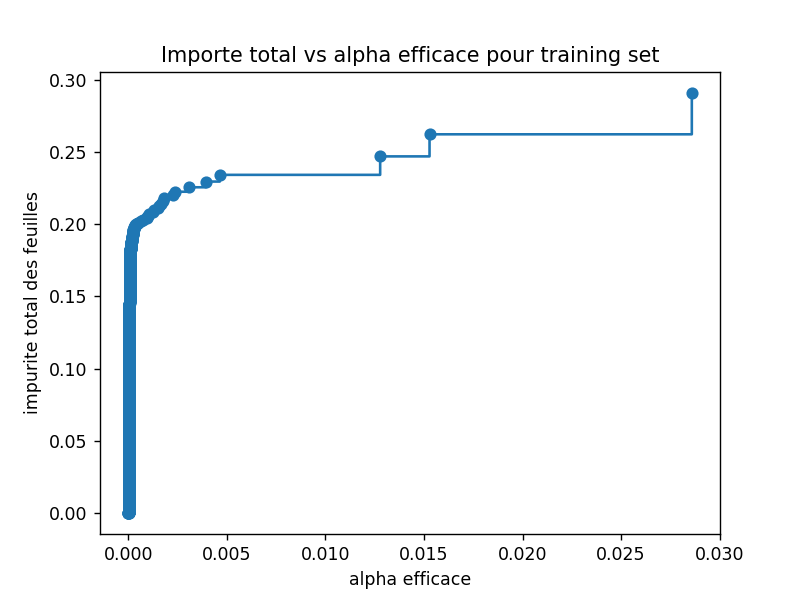

Text(0.5, 1.0, 'Importe total vs alpha efficace pour training set')

In [501]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efficace")
ax.set_ylabel("impurite total des feuilles")
ax.set_title("Importe total vs alpha efficace pour training set")


Nous utilisons maintenant les alphas effectifs pour entrainer un arbre de décision. La dernière valeur dans ccp alphas est la valeur alpha qui élimine tous les nœuds de l'arbre sauf un, clfs[-1].

In [502]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=15, ccp_alpha=ccp_alpha)
    clf.fit(X_train_arbre, y_train_arbre)
    clfs.append(clf)
print(
    "nombre de nodes dans la derniere arbre est: {} avec ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

nombre de nodes dans la derniere arbre est: 1 avec ccp_alpha: 0.07338566694800341


Le composant final dans clfs et ccp alphas est supprimé du reste de cet exemple car il s'agit d'un arbre simple avec un seul nœud. Ici, nous démontrons que lorsque alpha croît, le nombre de nœuds et la profondeur de l'arbre diminuent.

<IPython.core.display.Javascript object>


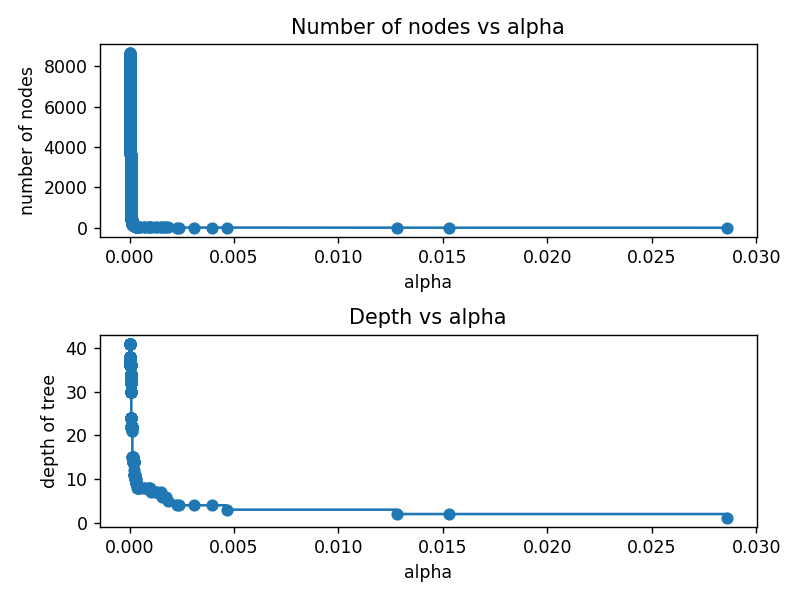

In [503]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

<IPython.core.display.Javascript object>


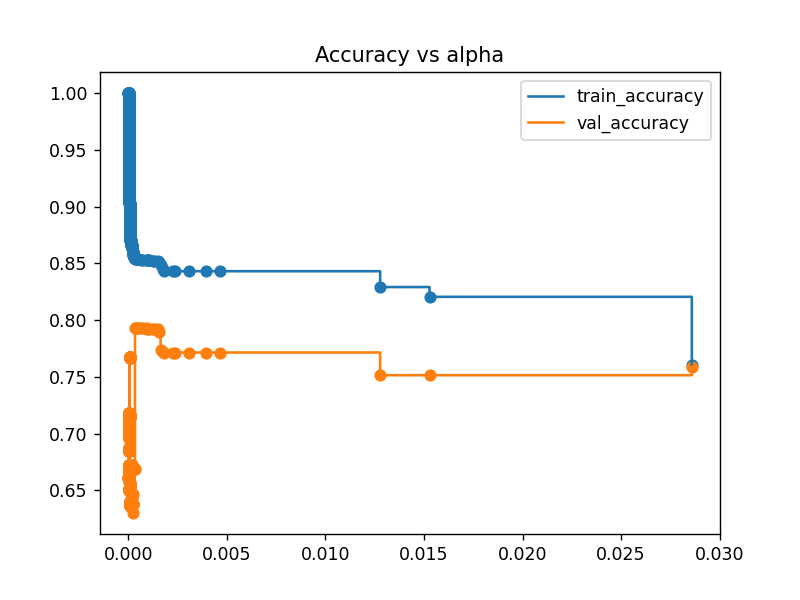

In [504]:
plt.figure()

train_acc = []
val_acc = []
for c in clfs:
    y_train_arbre_pred = c.predict(X_train_arbre)
    y_val_arbre_pred = c.predict(X_val_arbre)
    train_acc.append(accuracy_score(y_train_arbre,y_train_arbre_pred))
    val_acc.append(accuracy_score(y_val_arbre,y_val_arbre_pred))
    
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,val_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,val_acc,label='val_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [505]:
i = np.arange(len(ccp_alphas))
ccp = pd.DataFrame({'ccp' : pd.Series(ccp_alphas, index = i),'train_scores' : pd.Series(train_acc, index = i),
                   'val_scores' : pd.Series(val_acc, index = i)})
ccp.tail()
ccp[ccp['val_scores']==ccp['val_scores'].max()]

,ccp,train_scores,val_scores
1539,0.000346,0.854192,0.793196
1540,0.000396,0.854192,0.793196
1541,0.000417,0.853711,0.793196
1542,0.000473,0.853711,0.793196
1543,0.000502,0.853711,0.793196
1544,0.000669,0.853162,0.793196
1545,0.000757,0.853162,0.793196
1546,0.000944,0.853162,0.793196


<IPython.core.display.Javascript object>


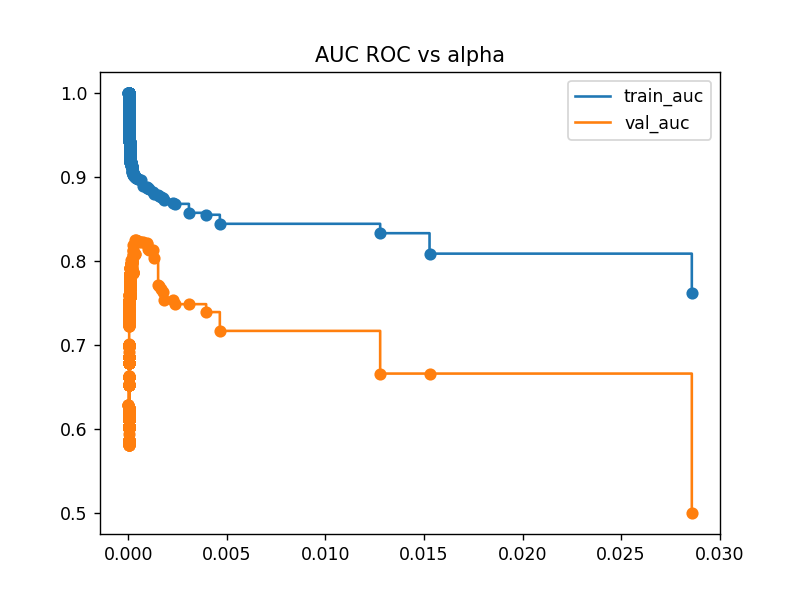

In [506]:
plt.figure()

train_auc = []
val_auc = []
for c in clfs:
    y_train_arbre_pred = c.predict_proba(X_train_arbre)
    y_val_arbre_pred = c.predict_proba(X_val_arbre)
    train_auc.append(roc_auc_score(y_train_arbre,y_train_arbre_pred[:,1]))
    val_auc.append(roc_auc_score(y_val_arbre,y_val_arbre_pred[:,1]))

plt.scatter(ccp_alphas,train_auc)
plt.scatter(ccp_alphas,val_auc)
plt.plot(ccp_alphas,train_auc,label='train_auc',drawstyle="steps-post")
plt.plot(ccp_alphas,val_auc,label='val_auc',drawstyle="steps-post")
plt.legend()
plt.title('AUC ROC vs alpha')
plt.show()

on vas zoomer un peu

<IPython.core.display.Javascript object>


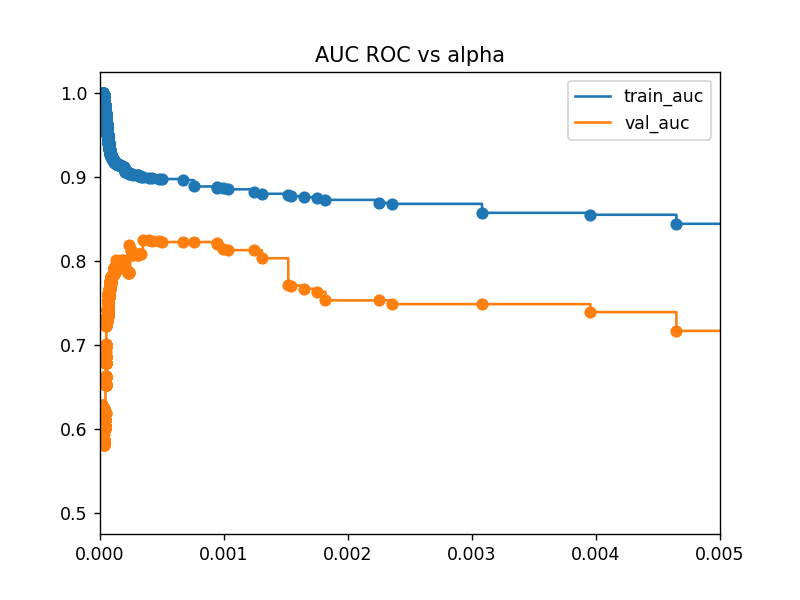

In [507]:
plt.figure()

train_auc = []
val_auc = []
for c in clfs:
    y_train_arbre_pred = c.predict_proba(X_train_arbre)
    y_val_arbre_pred = c.predict_proba(X_val_arbre)
    train_auc.append(roc_auc_score(y_train_arbre,y_train_arbre_pred[:,1]))
    val_auc.append(roc_auc_score(y_val_arbre,y_val_arbre_pred[:,1]))
plt.scatter(ccp_alphas,train_auc)
plt.scatter(ccp_alphas,val_auc)
plt.plot(ccp_alphas,train_auc,label='train_auc',drawstyle="steps-post")
plt.plot(ccp_alphas,val_auc,label='val_auc',drawstyle="steps-post")
plt.xlim(0, 0.005) # set the x-axis limits
plt.legend()
plt.title('AUC ROC vs alpha')
plt.show()


Un peu plus :)

<IPython.core.display.Javascript object>


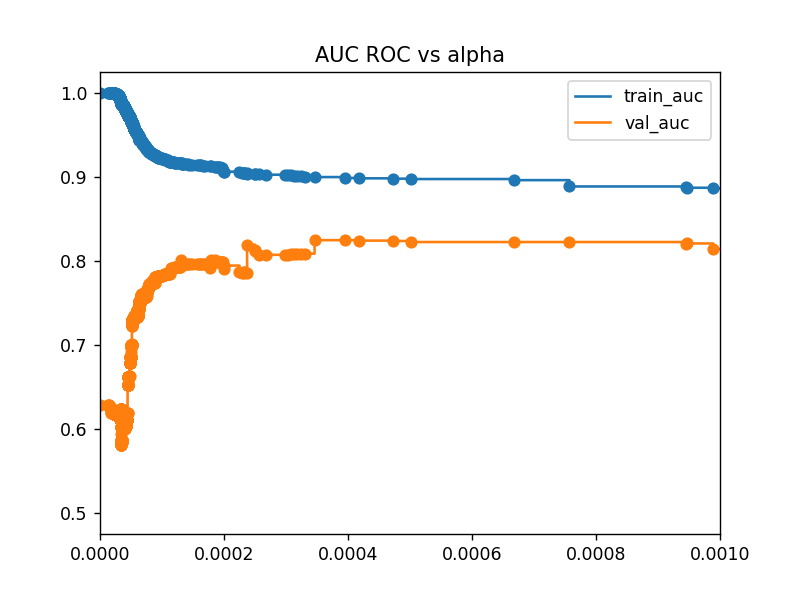

In [508]:
plt.figure()

train_auc = []
val_auc = []
for c in clfs:
    y_train_arbre_pred = c.predict_proba(X_train_arbre)
    y_val_arbre_pred = c.predict_proba(X_val_arbre)
    train_auc.append(roc_auc_score(y_train_arbre,y_train_arbre_pred[:,1]))
    val_auc.append(roc_auc_score(y_val_arbre,y_val_arbre_pred[:,1]))
    
plt.scatter(ccp_alphas,train_auc)
plt.scatter(ccp_alphas,val_auc)
plt.plot(ccp_alphas,train_auc,label='train_auc',drawstyle="steps-post")
plt.plot(ccp_alphas,val_auc,label='val_auc',drawstyle="steps-post")
plt.xlim(0, 0.001) # set the x-axis limits
plt.legend()
plt.title('AUC ROC vs alpha')
plt.show()

cela vpus rappel de qq chose? ;)

On choisie maintenant la valeur de alpha:

In [509]:
i = np.arange(len(ccp_alphas))
ccp = pd.DataFrame({'ccp' : pd.Series(ccp_alphas, index = i),'train_scores' : pd.Series(train_auc, index = i),
                   'val_scores' : pd.Series(val_auc, index = i)})
ccp.tail(3)
ccp[ccp['val_scores']==ccp['val_scores'].max()]

,ccp,train_scores,val_scores
1539,0.000346,0.899914,0.824813
1540,0.000396,0.898855,0.824813


Puis, on faisnotre arbre maintenat avec ce valeur de ccp

In [510]:
clf_elag=DecisionTreeClassifier(random_state=15,ccp_alpha=0.00043)

In [511]:
arbre_1_elag=clf_elag.fit(X_train_arbre,y_train_arbre)

On visualise cet arbre elagué.

<IPython.core.display.Javascript object>


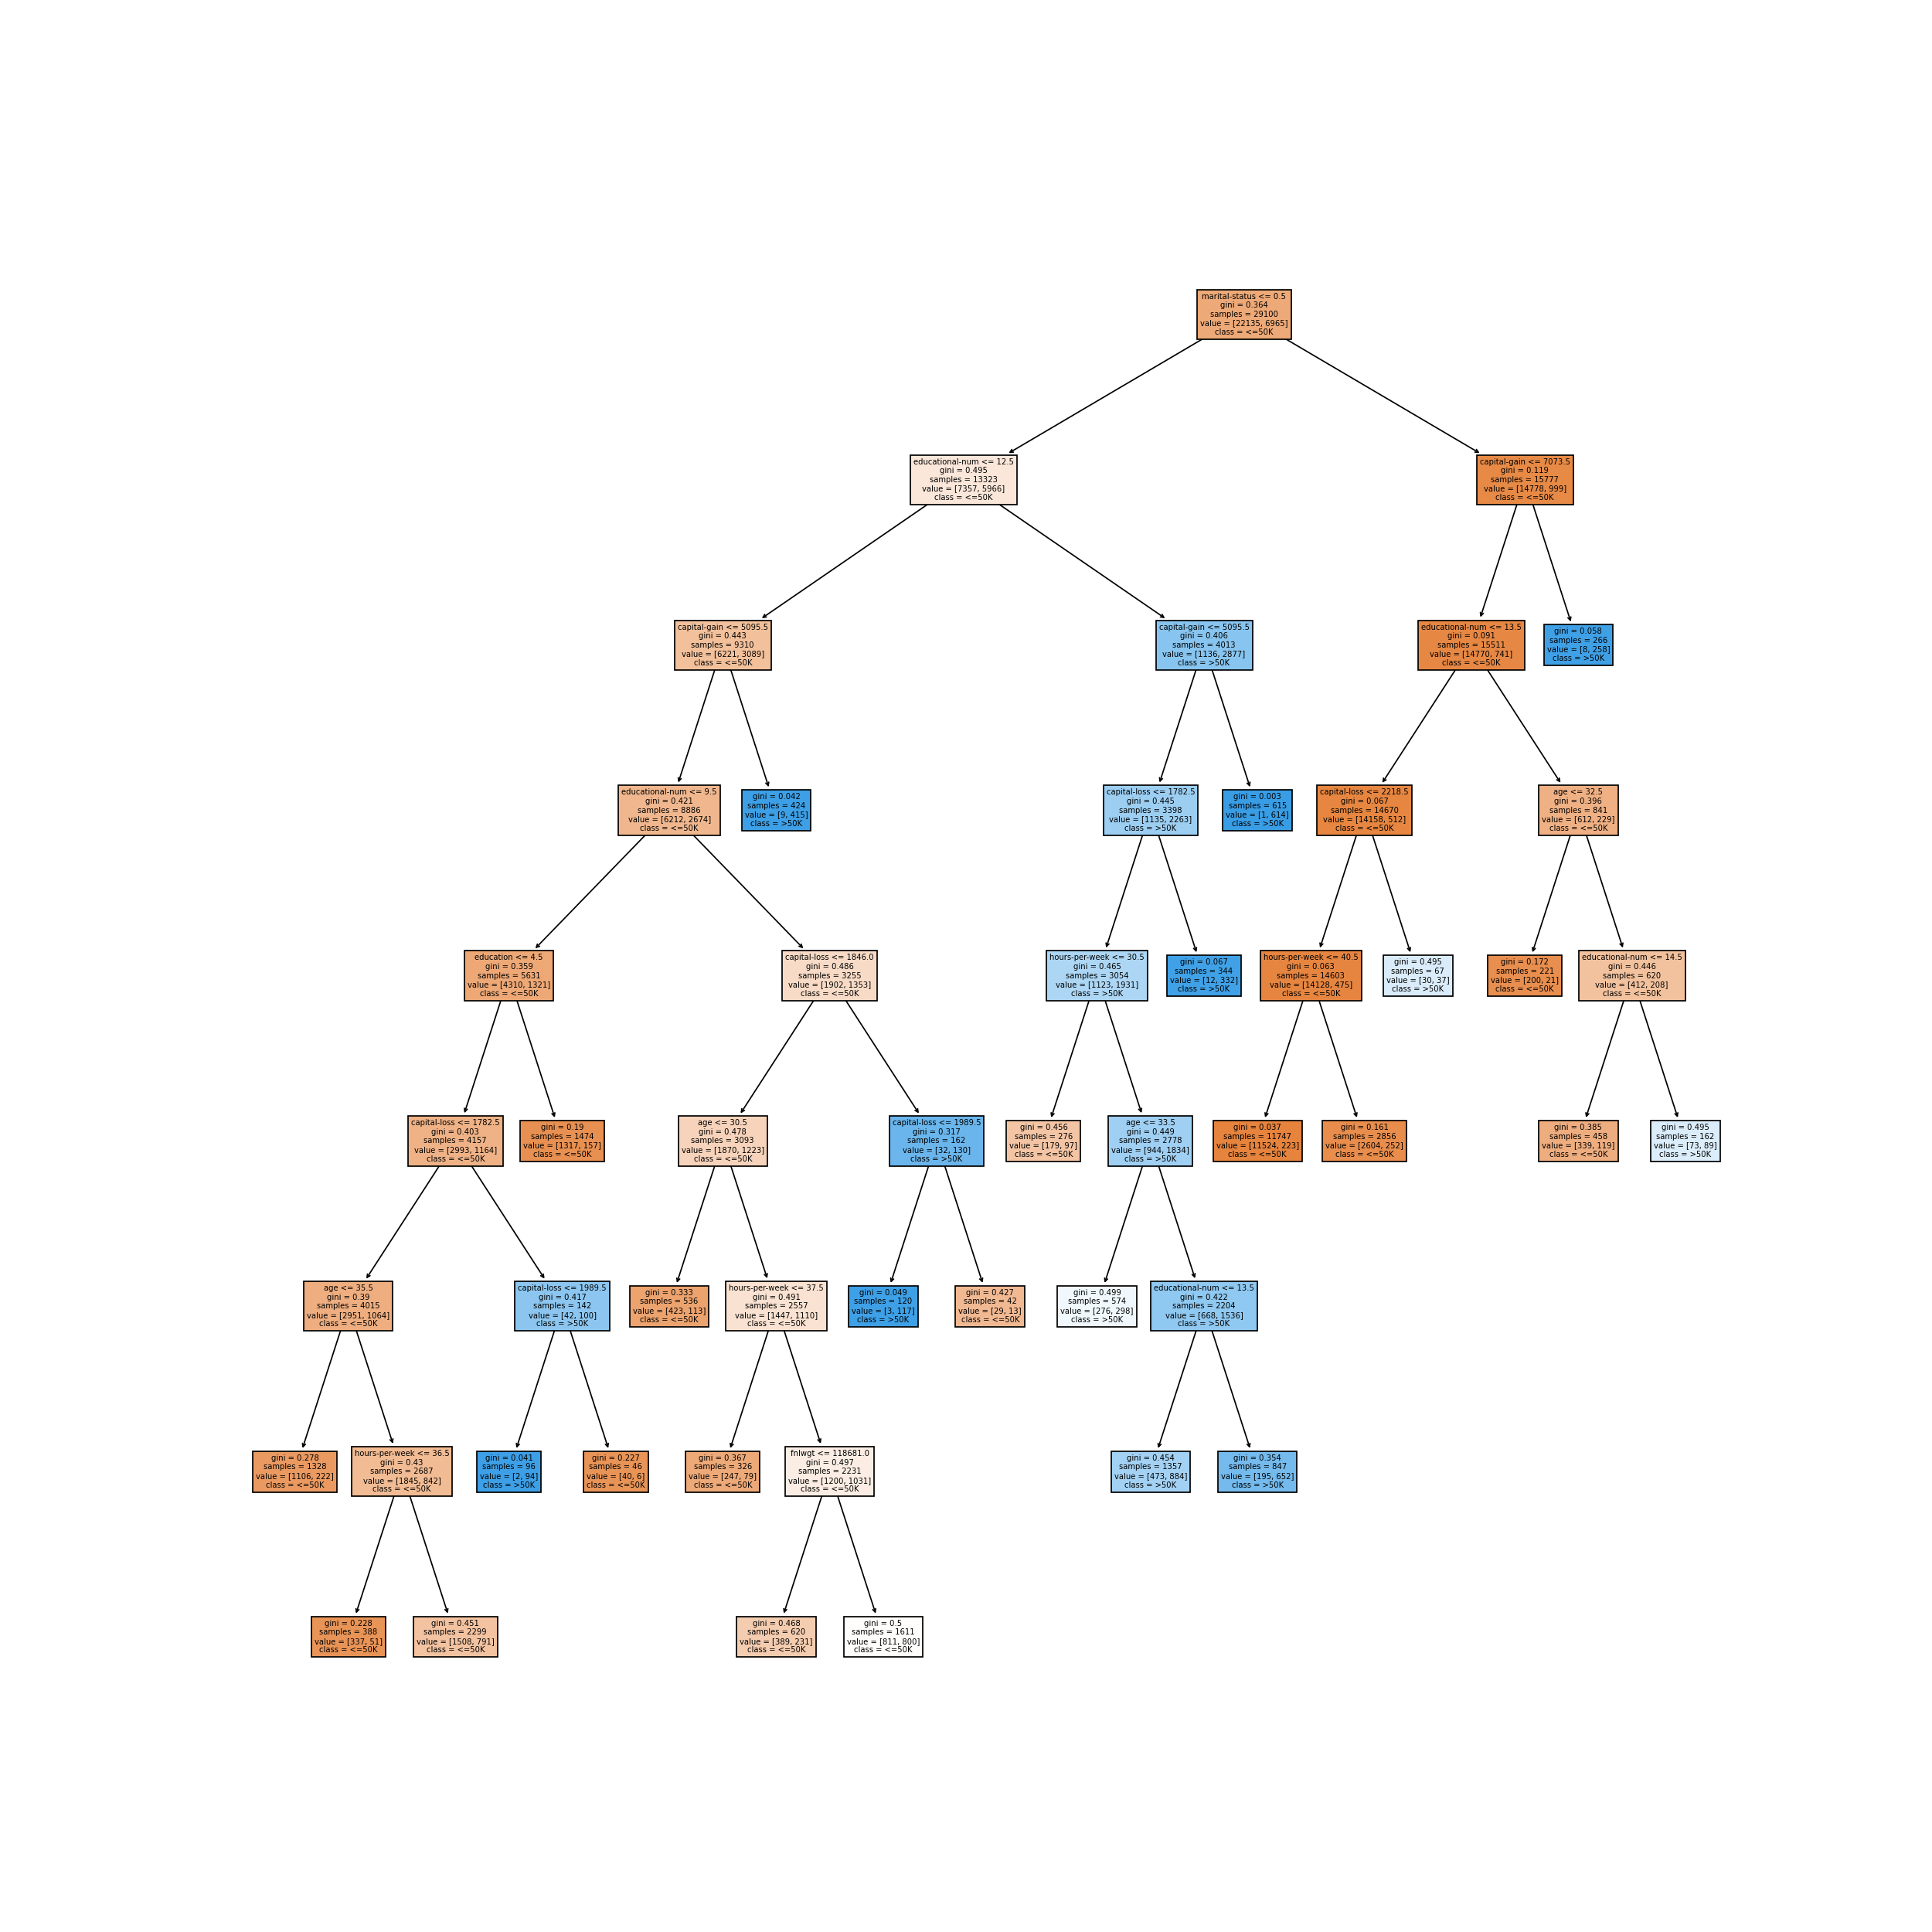

In [512]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(arbre_1_elag, filled=True, feature_names=features, class_names=classes)
plt.show()

Beaucoup mieux

#### Évaluer de performance

On prédit la valeur de la variable cible pour différentes versions du modèle. 

In [513]:
y_pred_1 = arbre_1.predict_proba(X_val_arbre)

In [514]:
y_pred_2 = arbre_2.predict_proba(X_val_arbre)

In [515]:
y_pred_prob = arbre_2.predict_proba(X_val_arbre)

In [520]:
y_pred_elag = arbre_1_elag.predict_proba(X_val_arbre)

array([[0.65593736, 0.34406264],
       [0.34856301, 0.65143699],
       [0.7891791 , 0.2108209 ],
       ...,
       [0.23022432, 0.76977568],
       [0.65593736, 0.34406264],
       [0.50341403, 0.49658597]])

In [516]:
y_pred_2[:1].mean()

0.5

On compare les performances en utilisant la mesure de AUC-ROC: 

In [521]:
print('AUC_ROC de validation pour le jeu de données original: {:.4f}'.format(roc_auc_score(y_val_arbre,y_pred_1[:,1])))
print('AUC_ROC de validation pour le jeu de données équilibré: {:.4f}'.format(roc_auc_score(y_val_arbre,y_pred_2[:,1])))
print('AUC_ROC de validation pour le jeu de données elag: {:.4f}'.format(roc_auc_score(y_val_arbre,y_pred_elag[:,1])))

AUC_ROC de validation pour le jeu de données original: 0.4813
AUC_ROC de validation pour le jeu de données équilibré: 0.4813
AUC_ROC de validation pour le jeu de données elag: 0.8243


### Évaluation du modèle choisi sur le jeu de données test 

Comme on a déjà vu dans le thème 5 ainsi que dans le cours d’apprentissage automatique, pour éviter le biais de performance, on ne peut pas se référer à la mesure calculée sur le jeu de données de validation. Maintenant, on évalue la performance du deuxième modèle elague sur le jeu de données du test.

In [ ]:
y_pred_test_arbre = arbre_1_elag.predict_proba(X_test_arbre)
print('AUC-ROC de test pour le jeu de données test: {:.3f}'.format(roc_auc_score(y_test_arbre,y_pred_test_arbre[:,1])))

In [ ]:
with plt.style.context('ggplot'):
    arbre_roc_auc = roc_auc_score(y_test_arbre, y_pred_test_arbre[:,1])
    fpr, tpr, thresholds = roc_curve(y_test_arbre, arbre_1_elag.predict_proba(X_test_arbre)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Arbre élagué (area = {:.3f})'.format(arbre_roc_auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('Taux de Faux Positive')
    plt.ylabel('Taux de Vrais Positive')
    plt.title('AUC-ROC')
    plt.legend(loc=4)
    plt.savefig('Arbre_ROC');

????un amelioration apraport de model regression logistique :)????

# MÉTHODES D'ENSEMBLE

## Modèle de bagging

### Apprentissage du modèle

In [ ]:
bagging_1=BaggingClassifier( n_estimators=20, random_state=42)

# Fit the bagging classifier to the data
bagging_1.fit(X_train_arbre, y_train_arbre)

pour deuxieme model je vais utiliser un arbre de classification avec la profondeur maximal de 3 comme le modèle de base:

In [ ]:
# Create a decision tree classifier to use as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Create a bagging classifier with 10 base estimators
bagging_2 = BaggingClassifier(base_estimator=base_estimator, n_estimators=25, random_state=42)

# Fit the bagging classifier to the data
bagging_2.fit(X_train_arbre, y_train_arbre)

### 3.2. Evaluation du modèle

Prédire en utilisant le classificateur de bagging_1

In [ ]:
# Predict using the bagging classifier
y_prob_bagging_1 = bagging_1.predict_proba(X_val_arbre)
#y_prob_bagging_1

Prédire en utilisant le classificateur de bagging_2

In [ ]:
y_prob_bagging_2 = bagging_2.predict_proba(X_val_arbre)
#y_prob_bagging_2

calculer AUC_ROC pour train

In [ ]:
# Prédire en utilisant le classificateur de bagging_1 sur les données d'entraînement
y_prob_bagging_1_train = bagging_1.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour bagging_1
auc_roc_train_bagging_1 = roc_auc_score(y_train_arbre, y_prob_bagging_1_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour bagging_1
print('AUC_ROC de train pour le modèle bagging_1 : {:.4f}'.format(auc_roc_train_bagging_1))

# Prédire en utilisant le classificateur de bagging_2 sur les données d'entraînement
y_prob_bagging_2_train = bagging_2.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour bagging_2
auc_roc_train_bagging_2 = roc_auc_score(y_train_arbre, y_prob_bagging_2_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour bagging_2
print('AUC_ROC de train pour le modèle bagging_2 : {:.4f}'.format(auc_roc_train_bagging_2))

L'ajustement pour le modèle bagging_1_train aboutit à une meilleur performance que celui de bagging_2_train

Calcul des AUC_ROC pour validation des deux modèles

In [ ]:
print('AUC_ROC de validation pour le model bagging_1: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_bagging_1[:,1])))

print('AUC_ROC de validation pour le model bagging_2: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_bagging_2[:,1])))

L'ajustement pour le modèle bagging_1_val aboutit à une meilleur performance que celui de bagging_2_val

Procédons aux étapes vues en cours pour s'assurer que nous ne faisons pas de sur ou sous-apprentissage:
1. Est-ce que le modèle performe bien sur les données d'entrainement (performance supérieure à 70%)?
- Si non: sous-apprentissage, donc il faut augmenter la complexité du modèle
- Si oui: tester la performance des données de validation.
Comme on obtient une performance de **bagging_1 : 0.9999** sur les données d'entrainement, nous ne sommes pas face à du sous apprentissage.
2. Est-ce le modèle performe bien sur les données de validation (performance supérieure à 70%)?
- Si non: sur-apprentissage, donc il faut augmenter ou diminuer la complexité du modèle.
- Si oui: pas besoin d'aller plus loin.
Comme on obtient une performance de **bagging_1: 0.7840** sur les données de validation, nous ne sommes pas face à du sur-apprentissage non plus.

## Modèle forêt aléatoire

### Apprentissage du modèle

On fait, un modèle de forêt aléatoire avec **20 arbres**

In [ ]:
foret_1=RandomForestClassifier(n_estimators=20, random_state=42)
# Fit the bagging classifier to the data
foret_1.fit(X_train_arbre, y_train_arbre)

On fait, un modèle de forêt aléatoire avec **200 arbres**

In [ ]:
foret_2 = RandomForestClassifier(n_estimators=200, random_state=42)

foret_2.fit(X_train_arbre, y_train_arbre)

Et, un modèle avec **200 arbres** et une **proportion des variables explicative de 0.8**

In [ ]:
foret_3=RandomForestClassifier(n_estimators=200, max_features= 0.7, random_state=42)
foret_3.fit(X_train_arbre, y_train_arbre)

### Evaluation du modèle

In [ ]:
y_prob_foret_1 = foret_1.predict_proba(X_val_arbre)
#y_prob_foret_1

In [ ]:
y_prob_foret_2 = foret_2.predict_proba(X_val_arbre)
#y_prob_foret_2

In [ ]:
y_prob_foret_3 = foret_3.predict_proba(X_val_arbre)
#y_prob_foret_3

In [ ]:
# Prédire en utilisant le modèle foret_1 sur les données d'entraînement
y_prob_foret_1_train = foret_1.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour foret_1
auc_roc_train_foret_1 = roc_auc_score(y_train_arbre, y_prob_foret_1_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour foret_1
print('AUC_ROC de train pour le modèle foret_1 : {:.4f}'.format(auc_roc_train_foret_1))

# Prédire en utilisant le modèle foret_2 sur les données d'entraînement
y_prob_foret_2_train = foret_2.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour foret_2
auc_roc_train_foret_2 = roc_auc_score(y_train_arbre, y_prob_foret_2_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour foret_2
print('AUC_ROC de train pour le modèle foret_2 : {:.4f}'.format(auc_roc_train_foret_2))

# Prédire en utilisant le modèle foret_3 sur les données d'entraînement
y_prob_foret_3_train = foret_3.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour foret_3
auc_roc_train_foret_3 = roc_auc_score(y_train_arbre, y_prob_foret_3_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour foret_3
print('AUC_ROC de train pour le modèle foret_3 : {:.4f}'.format(auc_roc_train_foret_3))

2e et 3e modèle performent mieux

In [ ]:
print('AUC_ROC de validation pour le model foret_1: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_foret_1[:,1])))

print('AUC_ROC de validation pour le model foret_2: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_foret_2[:,1])))

print('AUC_ROC de validation pour le model foret_3: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_foret_3[:,1])))

2e modèle performe mieux

Procédons aux étapes vues en cours pour s'assurer que nous ne faisons pas de sur ou sous-apprentissage:
1. Est-ce que le modèle performe bien sur les données d'entrainement (performance supérieure à 70%)?
- Si non: sous-apprentissage, donc il faut augmenter la complexité du modèle
- Si oui: tester la performance des données de validation.
Comme on obtient une performance de **1 (foret_2 ou 3)**  sur les données d'entrainement, nous ne sommes pas face à du sous apprentissage.
2. Est-ce le modèle performe bien sur les données de validation (performance supérieure à 70%)?
- Si non: sur-apprentissage, donc il faut augmenter ou diminuer la complexité du modèle.
- Si oui: pas besoin d'aller plus loin.
Comme on obtient une performance de **0.8432 (foret_2)** sur les données de validation, nous ne sommes pas face à du sur-apprentissage non plus.

## Modèle de Boosting

### Apprentissage du modèle

On developpe un modèle de adaboost de **200 arbres**

In [ ]:
boosting_1=AdaBoostClassifier(n_estimators=200, random_state=42)

boosting_1.fit(X_train_arbre, y_train_arbre)

On developpe un modèle de adaboost de **200 arbres** avec le modèle de base d'**arbre avec profondeur de 3**

In [ ]:
boosting_2 = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=200, random_state=42)

boosting_2.fit(X_train_arbre, y_train_arbre)


Et un modèle de adaboost de **200 arbres** et **learning rate de 0.05**

In [ ]:
boosting_3=AdaBoostClassifier(n_estimators=200,learning_rate=0.05 , random_state=42)
# Fit the bagging classifier to the data
boosting_3.fit(X_train_arbre, y_train_arbre)

### Evaluation du modèle

In [ ]:
y_prob_boosting_1 = boosting_1.predict_proba(X_val_arbre)
#y_prob_boosting_1

In [ ]:
y_prob_boosting_2 = boosting_2.predict_proba(X_val_arbre)
#y_prob_foret_2

In [ ]:
y_prob_boosting_3 = boosting_3.predict_proba(X_val_arbre)
#y_prob_foret_3

In [ ]:
# Prédire en utilisant le modèle boosting_1 sur les données d'entraînement
y_prob_boosting_1_train = boosting_1.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour boosting_1
auc_roc_train_boosting_1 = roc_auc_score(y_train_arbre, y_prob_boosting_1_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour boosting_1
print('AUC_ROC de train pour le modèle boosting_1 : {:.4f}'.format(auc_roc_train_boosting_1))

# Prédire en utilisant le modèle boosting_2 sur les données d'entraînement
y_prob_boosting_2_train = boosting_2.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour boosting_2
auc_roc_train_boosting_2 = roc_auc_score(y_train_arbre, y_prob_boosting_2_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour boosting_2
print('AUC_ROC de train pour le modèle boosting_2 : {:.4f}'.format(auc_roc_train_boosting_2))

# Prédire en utilisant le modèle boosting_3 sur les données d'entraînement
y_prob_boosting_3_train = boosting_3.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour boosting_3
auc_roc_train_boosting_3 = roc_auc_score(y_train_arbre, y_prob_boosting_3_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour boosting_3
print('AUC_ROC de train pour le modèle boosting_3 : {:.4f}'.format(auc_roc_train_boosting_3))

Deuxième modèle performe mieux.

In [ ]:
print('AUC_ROC de validation pour le model boosting_1: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_boosting_1[:,1])))

print('AUC_ROC de validation pour le model boosting_2: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_boosting_2[:,1])))

print('AUC_ROC de validation pour le model boosting_3: {:.4f}'.
      format(roc_auc_score(y_val_arbre,y_prob_boosting_3[:,1])))

premier modèle performe mieux.

Procédons aux étapes vues en cours pour s'assurer que nous ne faisons pas de sur ou sous-apprentissage:
1. Est-ce que le modèle performe bien sur les données d'entrainement (performance supérieure à 70%)?
- Si non: sous-apprentissage, donc il faut augmenter la complexité du modèle
- Si oui: tester la performance des données de validation.
Comme on obtient une performance de **boosting_2 : 0.9613** sur les données d'entrainement, nous ne sommes pas face à du sous apprentissage.
2. Est-ce le modèle performe bien sur les données de validation (performance supérieure à 70%)?
- Si non: sur-apprentissage, donc il faut augmenter ou diminuer la complexité du modèle.
- Si oui: pas besoin d'aller plus loin.
Comme on obtient une performance de **boosting_1: 0.8676** sur les données de validation, nous ne sommes pas face à du sur-apprentissage non plus.

## Gradiant Boosting

In [ ]:
# Modèle de Gradient Boosting avec 200 arbres
gboosting_1 = GradientBoostingClassifier(n_estimators=200, random_state=42)
gboosting_1.fit(X_train_arbre, y_train_arbre)

# Modèle de Gradient Boosting avec 200 arbres et un learning rate de 0.05
gboosting_2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
gboosting_2.fit(X_train_arbre, y_train_arbre)

# Prédire en utilisant le modèle boosting_1 sur les données d'entraînement
y_prob_gboosting_1_train = gboosting_1.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour boosting_1
auc_roc_train_gboosting_1 = roc_auc_score(y_train_arbre, y_prob_gboosting_1_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour boosting_1
print('AUC_ROC de train pour le modèle boosting_1 : {:.4f}'.format(auc_roc_train_gboosting_1))

# Prédire en utilisant le modèle boosting_2 sur les données d'entraînement
y_prob_gboosting_2_train = gboosting_2.predict_proba(X_train_arbre)

# Calculer l'AUC-ROC sur les données d'entraînement pour boosting_2
auc_roc_train_gboosting_2 = roc_auc_score(y_train_arbre, y_prob_gboosting_2_train[:, 1])

# Afficher l'AUC-ROC sur les données d'entraînement pour boosting_2
print('AUC_ROC de train pour le modèle boosting_2 : {:.4f}'.format(auc_roc_train_gboosting_2))

# Prédire en utilisant le modèle boosting_1 sur les données de validation
y_prob_gboosting_1_val = gboosting_1.predict_proba(X_val_arbre)

# Calculer l'AUC-ROC sur les données de validation pour boosting_1
auc_roc_val_gboosting_1 = roc_auc_score(y_val_arbre, y_prob_gboosting_1_val[:, 1])

# Afficher l'AUC-ROC sur les données de validation pour boosting_1
print('AUC_ROC de validation pour le modèle gboosting_1 : {:.4f}'.format(auc_roc_val_gboosting_1))

# Prédire en utilisant le modèle boosting_2 sur les données de validation
y_prob_gboosting_2_val = gboosting_2.predict_proba(X_val_arbre)

# Calculer l'AUC-ROC sur les données de validation pour boosting_2
auc_roc_val_gboosting_2 = roc_auc_score(y_val_arbre, y_prob_gboosting_2_val[:, 1])

# Afficher l'AUC-ROC sur les données de validation pour boosting_2
print('AUC_ROC de validation pour le modèle gboosting_2 : {:.4f}'.format(auc_roc_val_gboosting_2))

Procédons aux étapes vues en cours pour s'assurer que nous ne faisons pas de sur ou sous-apprentissage:
1. Est-ce que le modèle performe bien sur les données d'entrainement (performance supérieure à 70%)?
- Si non: sous-apprentissage, donc il faut augmenter la complexité du modèle
- Si oui: tester la performance des données de validation.
Comme on obtient une performance de **gboosting_1 : 0.9322** sur les données d'entrainement, nous ne sommes pas face à du sous apprentissage.
2. Est-ce le modèle performe bien sur les données de validation (performance supérieure à 70%)?
- Si non: sur-apprentissage, donc il faut augmenter ou diminuer la complexité du modèle.
- Si oui: pas besoin d'aller plus loin.
Comme on obtient une performance de **gboosting_1 : 0.8700** sur les données de validation, nous ne sommes pas face à du sur-apprentissage non plus.

# COMPARAISON DES MODÈLES

## AUC ROC sur validation

Premièrement, on calcul le Taux de Faux Positif, Taux de Vrai Positif pour chaque modeles pour courbe ROC:

In [ ]:
# Bagging
Bag_fpr, Bag_tpr, Bag_thresholds = roc_curve(y_val_arbre, y_prob_bagging_1[:,1])

# Forêt Aléatoire
FA_fpr, FA_tpr, FA_thresholds = roc_curve(y_val_arbre, y_prob_foret_3[:,1])

# Boosting
Boo_fpr, Boo_tpr, Boo_thresholds = roc_curve(y_val_arbre, y_prob_boosting_1[:,1])

# Gradiant Boosting
GB_fpr, GB_tpr, GB_thresholds = roc_curve(y_val_arbre, y_prob_gboosting_1_val[:, 1])

###################################### 
#####LES DEUX NOUVELLES METHODES QUE JE N'ARRIVE PAS A AJOUTER
######################################

# Arbre de classification (Classification)
#CT_fpr, CT_tpr, CT_thresholds = roc_curve(y_val_arbre, y_pred_1[:, 1])

# Regression logistique
#RL_fpr, RL_tpr, RL_thresholds = roc_curve(y_test_logistique, y_pred_test[:, 1])

Par la suit, on calcule le score de AUC Roc pour chaque modèle

In [ ]:
# Bagging
Bag_auc = roc_auc_score(y_val_arbre, y_prob_bagging_1[:,1])

# Forêt Aléatoir
FA_auc = roc_auc_score(y_val_arbre, y_prob_foret_3[:,1])

# Boosting
Boo_auc = roc_auc_score(y_val_arbre, y_prob_boosting_1[:,1])

#Gradiant Boosting
GB_auc = roc_auc_score(y_val_arbre, y_prob_gboosting_1_val[:, 1])

###################################### 
#####LES DEUX NOUVELLES METHODES QUE JE N'ARRIVE PAS A AJOUTER
######################################

# Arbre de classification (Classification)
#CT_auc = roc_auc_score(y_val_arbre, y_pred_1[:, 1])

# Regression logistique
#RL_auc = roc_auc_score(y_test_logistique, y_pred_test[:, 1])

Créer la graphique de AUC_Roc pour tous les modèles 

In [ ]:
###################################### 
##### ICI IL FAUT AJOUTER LA LOGISTIQUE ET LARBRE QUE JE N'AI PAS REUSSI A METTRE AU DESSUS
######################################

import matplotlib.pyplot as plt
plt.figure()
plt.plot(Bag_fpr, Bag_tpr, label="Bagging (AUC = {:.3f})".format(Bag_auc))
plt.plot(FA_fpr, FA_tpr, label="Foret Aléatoire (AUC = {:.3f})".format(FA_auc))
plt.plot(Boo_fpr, Boo_tpr, label="Boosting (AUC = {:.3f})".format(Boo_auc))
plt.plot(GB_fpr, GB_tpr, label="Grading Boosting (AUC = {:.3f})".format(GB_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Alors, le meilleur modèle basé sur la validation est **GRADIANT BOOSTING**. Nous devrions ensuite calculer ses performances sur le jeu de test à l'étape suivante

## Évaluation du modèle choisi sur le jeu de données test 

Comme on a déjà vu dans le thème 5 ainsi que dans le cours d’apprentissage automatique, pour éviter le biais de performance, on ne peut pas se référer à la mesure calculée sur le jeu de données de validation. Maintenant, on évalue la performance du deuxième modèle elague sur le jeu de données du test.

In [ ]:
# Prédire en utilisant le modèle boosting_1 sur les données de test
y_pred_test_arbre = gboosting_1.predict_proba(X_test_arbre)

# Calculer l'AUC-ROC sur les données de test pour boosting_1
auc_roc_test = roc_auc_score(y_test_arbre, y_pred_test_arbre[:, 1])

# Afficher l'AUC-ROC sur les données de test pour boosting_1
print('AUC-ROC de test pour le jeu de données test: {:.3f}'.format(auc_roc_test))

In [ ]:
with plt.style.context('ggplot'):
    gb_roc_auc = roc_auc_score(y_test_arbre, gboosting_1.predict_proba(X_test_arbre)[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test_arbre, gboosting_1.predict_proba(X_test_arbre)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.3f})'.format(gb_roc_auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc=4)
    plt.savefig('Gradient_Boosting_ROC')

Une amélioration aux autres modèles :)

## Le lift

Ce code prédit les étiquettes de classe pour le modèle Gradient Boosting sur les données de test, puis calcule et affiche l'AUC-ROC pour évaluer la performance du modèle. Ensuite, il calcule le lift en triant les prédictions et les étiquettes réelles en fonction des probabilités prédites, puis trace la courbe de lift pour évaluer l'efficacité du modèle dans l'identification de la classe positive.

In [ ]:
# Test d'un code pour le lift (à vérifier)
plt.figure()
import numpy as np
import matplotlib.pyplot as plt

 
# Prédire en utilisant le modèle boosting_1 sur les données de test
y_pred_test_arbre = gboosting_1.predict_proba(X_test_arbre)

# Extract the predicted probabilities for the positive class
predicted_probabilities = y_pred_test_arbre[:, 1]

# Create an array of actual labels for the test data
actual_labels = np.array(y_test_arbre)

# Sort the predicted probabilities and actual labels in descending order of the probabilities
sorted_indices = np.argsort(predicted_probabilities)[::-1]
sorted_probabilities = predicted_probabilities[sorted_indices]
sorted_labels = actual_labels[sorted_indices]

# Calculate the cumulative response rate (CRR) and the cumulative lift
total_positive = np.sum(sorted_labels)
total_instances = len(sorted_labels)
cumulative_positive = np.cumsum(sorted_labels)
cumulative_instances = np.arange(1, total_instances + 1)

cumulative_response_rate = cumulative_positive / total_positive
cumulative_lift = cumulative_response_rate / (cumulative_instances / total_instances)

# Calculate the percentage of test instances and round it to 100%
percentage_instances = (cumulative_instances / total_instances) * 100
percentage_instances = np.round(percentage_instances)

# Plot the lift curve
plt.plot(percentage_instances, cumulative_lift, label='Boosting_1')
plt.xlabel('Percentage of Test Instances')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.grid(True)
plt.show()